# Final Project Kelompok 7 : E-Commerce Shipping Data

*Data set yang digunakan merupakan dataset dari sebuah perusahaan e-commerce internasional yang ingin mengetahui key insight dari database konsumen. *

Content . 
Dataset ini terdari dari 10999 observations dari 12 variable.
Dataset ini memiliki informasi sebagai berikut:

ID : Nomor ID Pelanggan.

Warehouse block : Perusahaan memiliki Gudang besar yang terbagi menjadi blok-blok seperti A,B,C,D,E.

Mode of shipment :Perusahaan mengirimkan produk dengan berbagai cara seperti Ship, Flight, dan Road.

Customer care calls: Jumlah panggilan yang dilakukan dari penyelidikan untuk penyelidikan kiriman.

Customer rating: Perusahaan telah menilai dari setiap pelanggan. 1 adalah yang terendah (Terburuk), 5 adalah yang tertinggi (Terbaik).

Cost of the product: Biaya Produk dalam Dolar AS.

prior purchase: Jumlah Pembelian Sebelumnya.

product importance: Perusahaan telah mengkategorikan produk dalam berbagai parameter seperti rendah, sedang, tinggi.

gender: Pria dan Wanita.

Discount offered: Diskon yang ditawarkan untuk produk tertentu itu.

Weight in gms: Ini adalah berat dalam gram.

reached on time: Ini adalah variabel target, di mana 1 Menunjukkan bahwa produk TIDAK tercapai tepat waktu dan 0 menunjukkan telah tercapai tepat waktu.


Load dataset dan lihat isi dari kolom

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
sns.set_theme(palette='summer', style='darkgrid')

In [2]:
df = pd.read_csv('Train.csv')
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
## melihat apakah ada kolom kosong atau tidak
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
df.shape #melihat jumlah baris dan jumlah kolom dari dataset

(10999, 12)

In [ ]:
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered','Weight_in_gms']

In [ ]:
# melihat gambaran umum statistik deskriptif dari data
df.describe()

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

In [ ]:
df[cats].describe()

Reached.on.Time_Y.N
count         10999.000000
mean              0.596691
std               0.490584
min               0.000000
25%               0.000000
50%               1.000000
75%               1.000000
max               1.000000

#**1. Descriptive Statistic**

##A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? 
- Semua tipe data sudah sesuai

#B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
- tidak ada kolom yang memiliki nilai kosong

#C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)
- kolom prior_purchase memiliki keanehan karena nilai Q1 dan Q2 memiliki nilai yang sama jadi memungkinkan kolom tersebut ada nilai yang mendominasi.
- kolom Discount_offered memiliki keanehan karena mean > median jadi memungkinkan kolom tersebut right skewed dan memiliki outliers.
- kolom Weight_in_gms memiliki keanehan karena nilai mean < median jadi memungkinkan kolom tersebut memiliki left skew dan memiliki outliers.

# Univariate Analysis pada kolom kategorikal

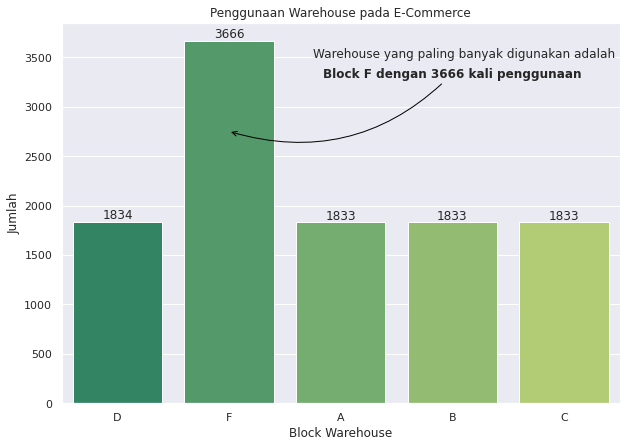

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(data=df, x='Warehouse_block')
plt.title('Penggunaan Warehouse pada E-Commerce')
plt.xlabel('Block Warehouse')
plt.ylabel('Jumlah')
plt.annotate('Warehouse yang paling banyak digunakan adalah', 
            xy=(1.75, 3500),fontsize=12)
plt.annotate('Block F dengan 3666 kali penggunaan',xy=(1, 2750), xytext=(3, 3300), arrowprops=dict(color='black',arrowstyle="->",connectionstyle="arc3,rad=-.3"),fontsize=12, fontweight='bold',ha='center')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [ ]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 41.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


<ipython-input-13-b3c92ad6b5d7>:9: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('Kapal',xy=(0, 2750), xytext=(1.5, 3500), arrowprops=dict(color="black",facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=-.3"),fontsize=16, fontweight='bold',ha='center')


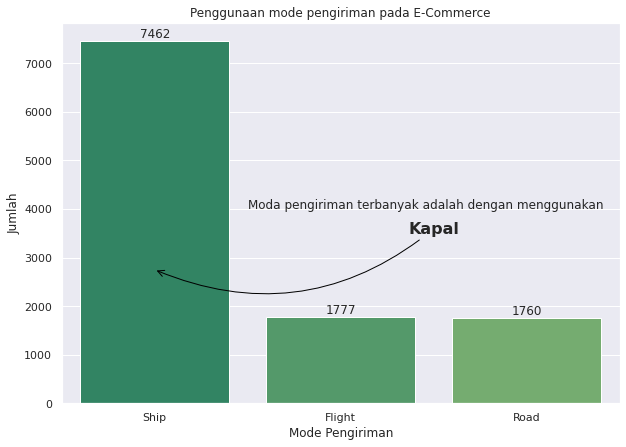

In [ ]:
plt.figure(figsize = (10,7))
df_grouped = df.groupby('Mode_of_Shipment')['ID'].nunique().reset_index(name='ID').sort_values(by='ID', ascending=False)
ax = sns.barplot(data=df_grouped, x='Mode_of_Shipment',y='ID')
plt.title('Penggunaan mode pengiriman pada E-Commerce')
plt.xlabel('Mode Pengiriman')
plt.ylabel('Jumlah')
plt.annotate('Moda pengiriman terbanyak adalah dengan menggunakan ', 
            xy=(0.5, 4000),fontsize=12)
plt.annotate('Kapal',xy=(0, 2750), xytext=(1.5, 3500), arrowprops=dict(color="black",facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=-.3"),fontsize=16, fontweight='bold',ha='center')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

<ipython-input-14-6d9ff11c59b0>:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('Low',xy=(0, 2750), xytext=(1.5, 6000), arrowprops=dict(color="black",facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=0.3"),fontsize=12,ha='center',fontweight='bold')


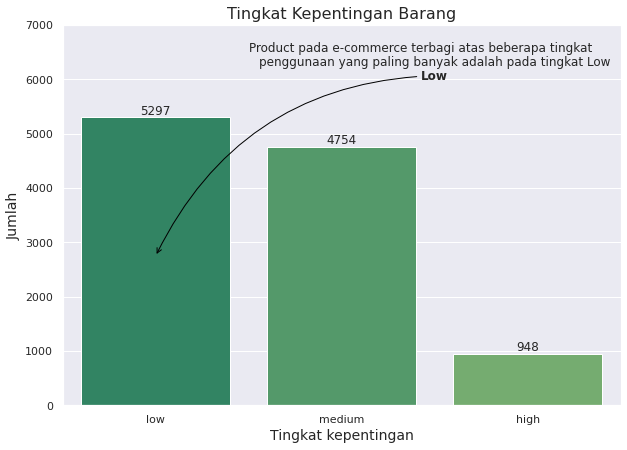

In [ ]:
plt.figure(figsize = (10,7))
df_grouped = df.groupby('Product_importance')['ID'].nunique().reset_index(name='ID').sort_values(by='ID', ascending=False)
ax = sns.barplot(data=df_grouped, x='Product_importance',y='ID')
plt.title('Tingkat Kepentingan Barang', fontsize=16)
plt.xlabel('Tingkat kepentingan', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.ylim(0,7000)
plt.annotate('Product pada e-commerce terbagi atas beberapa tingkat ', 
            xy=(0.5, 6500),fontsize=12,ha='left')
plt.annotate('penggunaan yang paling banyak adalah pada tingkat Low', xy=(1.5, 6250),ha='center',fontsize=12)
plt.annotate('Low',xy=(0, 2750), xytext=(1.5, 6000), arrowprops=dict(color="black",facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=0.3"),fontsize=12,ha='center',fontweight='bold')
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

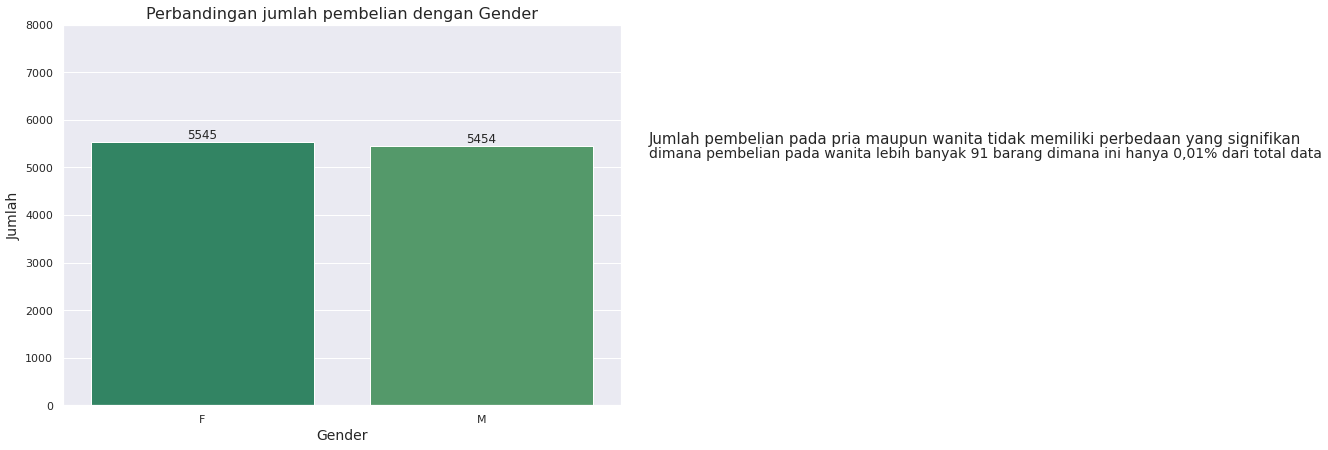

In [ ]:
plt.figure(figsize = (10,7))
df_grouped = df.groupby('Gender')['ID'].nunique().reset_index(name='ID').sort_values(by='ID', ascending=False)
ax = sns.barplot(data=df_grouped, x='Gender',y='ID')
plt.title('Perbandingan jumlah pembelian dengan Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.ylim(0,8000)
plt.text(s='Jumlah pembelian pada pria maupun wanita tidak memiliki perbedaan yang signifikan ', 
            x=1.6,y=5500,fontsize=15,ha='left')
plt.text(s='dimana pembelian pada wanita lebih banyak 91 barang dimana ini hanya 0,01% dari total data',
          x=1.6,y=5200,fontsize=14,ha='left')
         

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

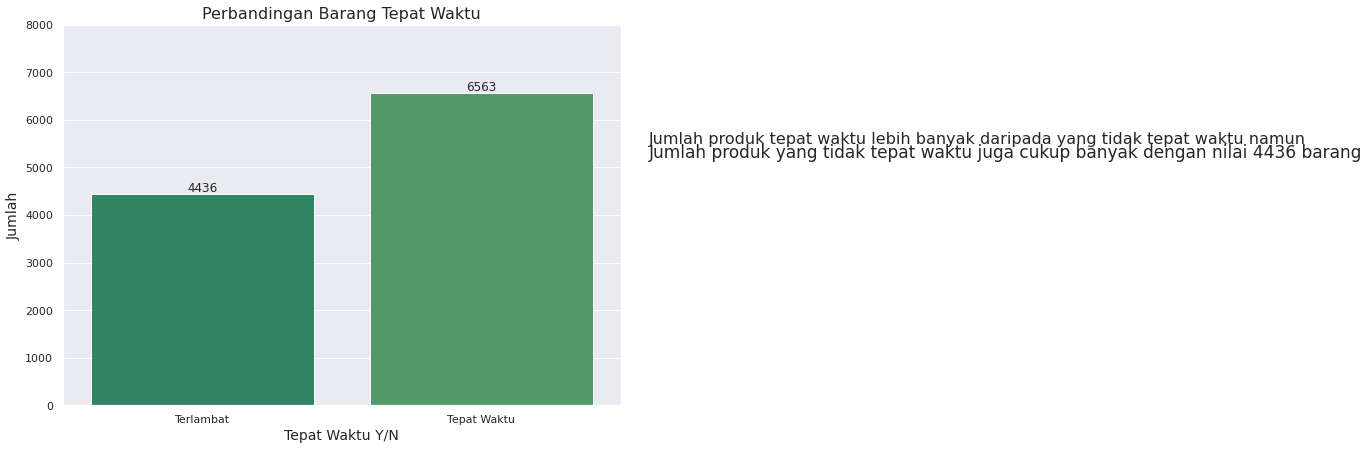

In [ ]:
plt.figure(figsize = (10,7))
df_grouped = df.groupby('Reached.on.Time_Y.N')['ID'].nunique().reset_index(name='ID').sort_values(by='ID', ascending=False)
ax = sns.barplot(data=df_grouped, x='Reached.on.Time_Y.N',y='ID')
plt.title('Perbandingan Barang Tepat Waktu', fontsize=16)
x = [0,1]
labels = ['Terlambat','Tepat Waktu']
plt.xticks(x, labels)
plt.xlabel('Tepat Waktu Y/N', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.ylim(0,8000)
plt.text(s='Jumlah produk tepat waktu lebih banyak daripada yang tidak tepat waktu namun', 
            x=1.6,y=5500,fontsize=16,ha='left')
plt.text(s='Jumlah produk yang tidak tepat waktu juga cukup banyak dengan nilai 4436 barang',
          x=1.6,y=5200,fontsize=17,ha='left')
         
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

# Analisis Univariate Kolom Numerical

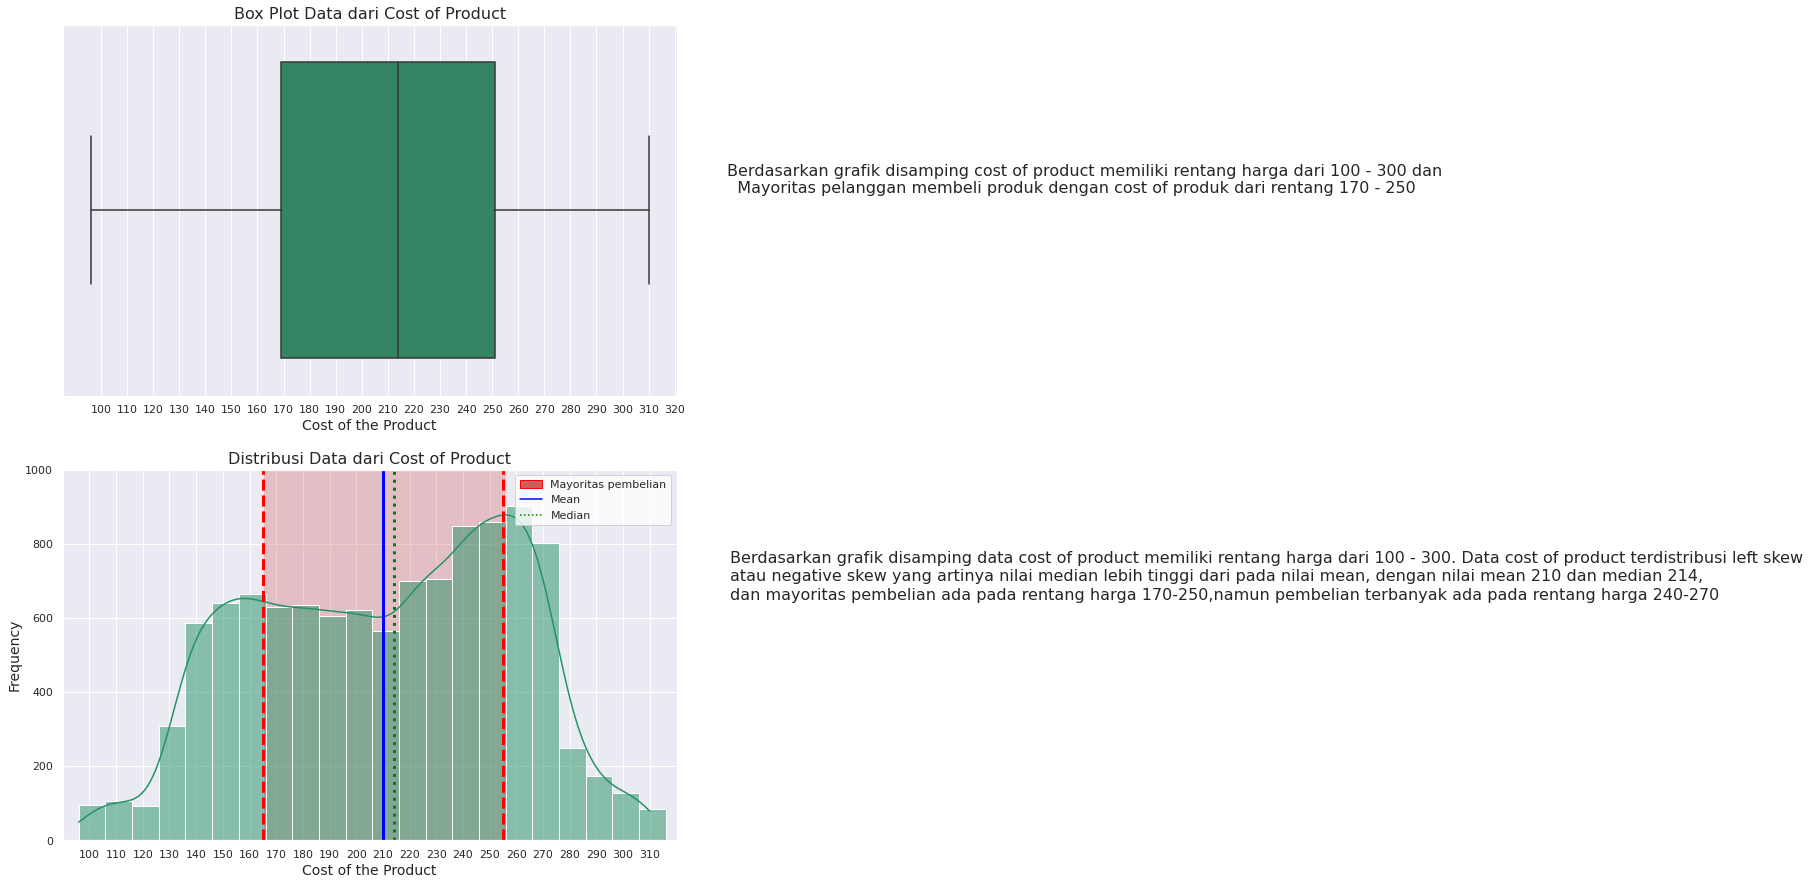

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(11,15))
sns.boxplot(ax=ax[0],data=df, x='Cost_of_the_Product')
ax[0].set_title('Box Plot Data dari Cost of Product',fontsize=16)
ax[0].set_xlabel('Cost of the Product',fontsize=14)
ax[0].text(x=340,y=0, s='Berdasarkan grafik disamping cost of product memiliki rentang harga dari 100 - 300 dan \n  Mayoritas pelanggan membeli produk dengan cost of produk dari rentang 170 - 250\n',
           fontsize=16)
ticks = np.arange(100, 330,10)
ax[0].set_xticks(ticks)
ax[0].set_xticklabels([round(x) for x in ticks])


sns.histplot(ax=ax[1],data=df,x="Cost_of_the_Product",kde=True,binwidth=10)
ax[1].set_title('Distribusi Data dari Cost of Product',fontsize=16)
ax[1].set_ylabel('Frequency',fontsize=14)
ax[1].set_xlabel('Cost of the Product',fontsize=14)
ax[1].set_xlim(90,320)
ticks = np.arange(100, 320,10)
ax[1].set_xticks(ticks)
ax[1].set_ylim(0,1000)
ax[1].stackplot(np.arange(165, 257), [[1000]], colors=('indianred',), alpha=0.3)
ax[1].axvline(x=165, color='red', linestyle='--', linewidth=3)
ax[1].axvline(x=255, color='red', linestyle='--', linewidth=3)
ax[1].axvline(x=np.mean(df['Cost_of_the_Product']), color='blue', linestyle='solid', linewidth=3)
ax[1].axvline(x=np.median(df['Cost_of_the_Product']), color='green', linestyle='dotted', linewidth=3)
ax[1].text(x=340,y=750, s='Berdasarkan grafik disamping data cost of product memiliki rentang harga dari 100 - 300. Data cost of product terdistribusi left skew ' ,fontsize=16)
ax[1].text(x=340,y= 700,s='atau negative skew yang artinya nilai median lebih tinggi dari pada nilai mean, dengan nilai mean 210 dan median 214, ' ,fontsize=16)
ax[1].text(x=340,y=650, s='dan mayoritas pembelian ada pada rentang harga 170-250,namun pembelian terbanyak ada pada rentang harga 240-270  ',fontsize=16)




legend_elements = [Patch(facecolor='indianred', edgecolor='r',
                         label='Mayoritas pembelian'),
                   Line2D([0], [0], ls='solid', color='blue', label='Mean',
                          markerfacecolor='g', markersize=15),
                   Line2D([0], [1], ls='dotted', color='green', label='Median',
                          markerfacecolor='g', markersize=15),]
ax[1].legend(handles=legend_elements, loc='upper right',frameon=True, facecolor='White')

plt.show()

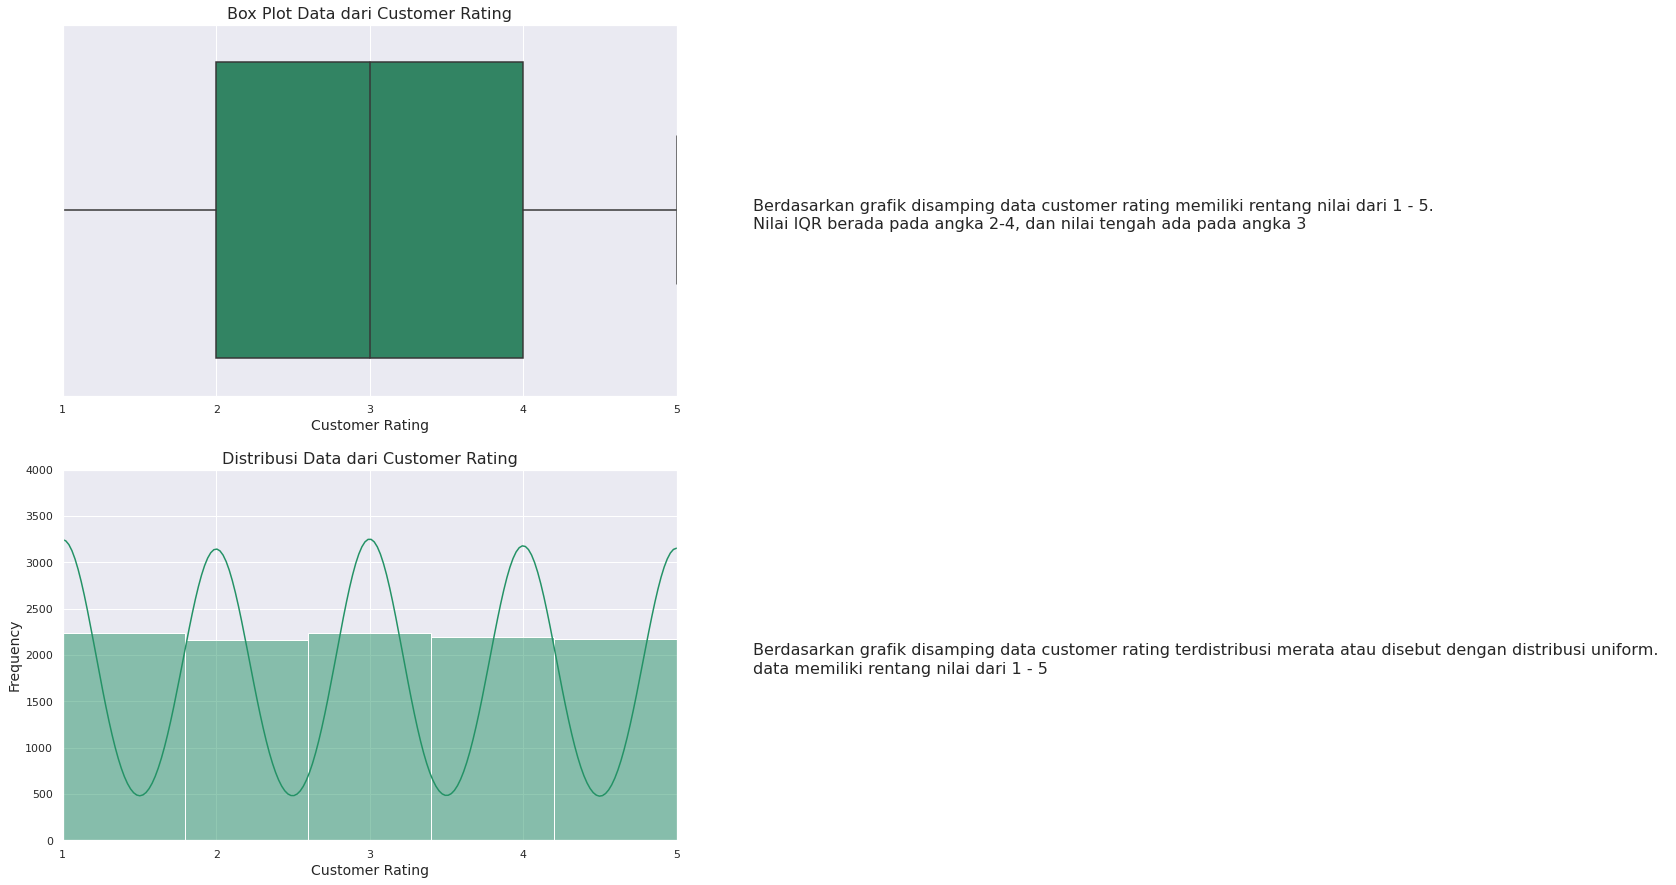

In [ ]:

fig, ax = plt.subplots(2, 1, figsize=(11,15))
sns.boxplot(ax=ax[0],data=df, x='Customer_rating')
ax[0].set_title('Box Plot Data dari Customer Rating', fontsize=16)
ax[0].set_xlabel('Customer Rating', fontsize=14)
ax[0].set_xlim(1,5)
ticks = np.arange(1, 6)
ax[0].set_xticks(ticks)
ax[0].text(x=5.5,y=0, s='Berdasarkan grafik disamping data customer rating memiliki rentang nilai dari 1 - 5. ' ,fontsize=16)
ax[0].text(x=5.5,y=0.05, s='Nilai IQR berada pada angka 2-4, dan nilai tengah ada pada angka 3',fontsize=16)




sns.histplot(ax=ax[1],data=df,x="Customer_rating",bins=5,kde=True)
ax[1].set_title('Distribusi Data dari Customer Rating', fontsize=16)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].set_ylim(0,4000)
ax[1].set_xlim(1,5)
ax[1].text(x=5.5,y=2000, s='Berdasarkan grafik disamping data customer rating terdistribusi merata atau disebut dengan distribusi uniform.  ' ,fontsize=16)
ax[1].text(x=5.5,y=1800, s='data memiliki rentang nilai dari 1 - 5',fontsize=16)


ticks = np.arange(1, 6)
ax[1].set_xticks(ticks)
ax[1].set_xticklabels([round(x) for x in ticks])
ax[1].set_xlabel('Customer Rating',fontsize=14)


plt.show()

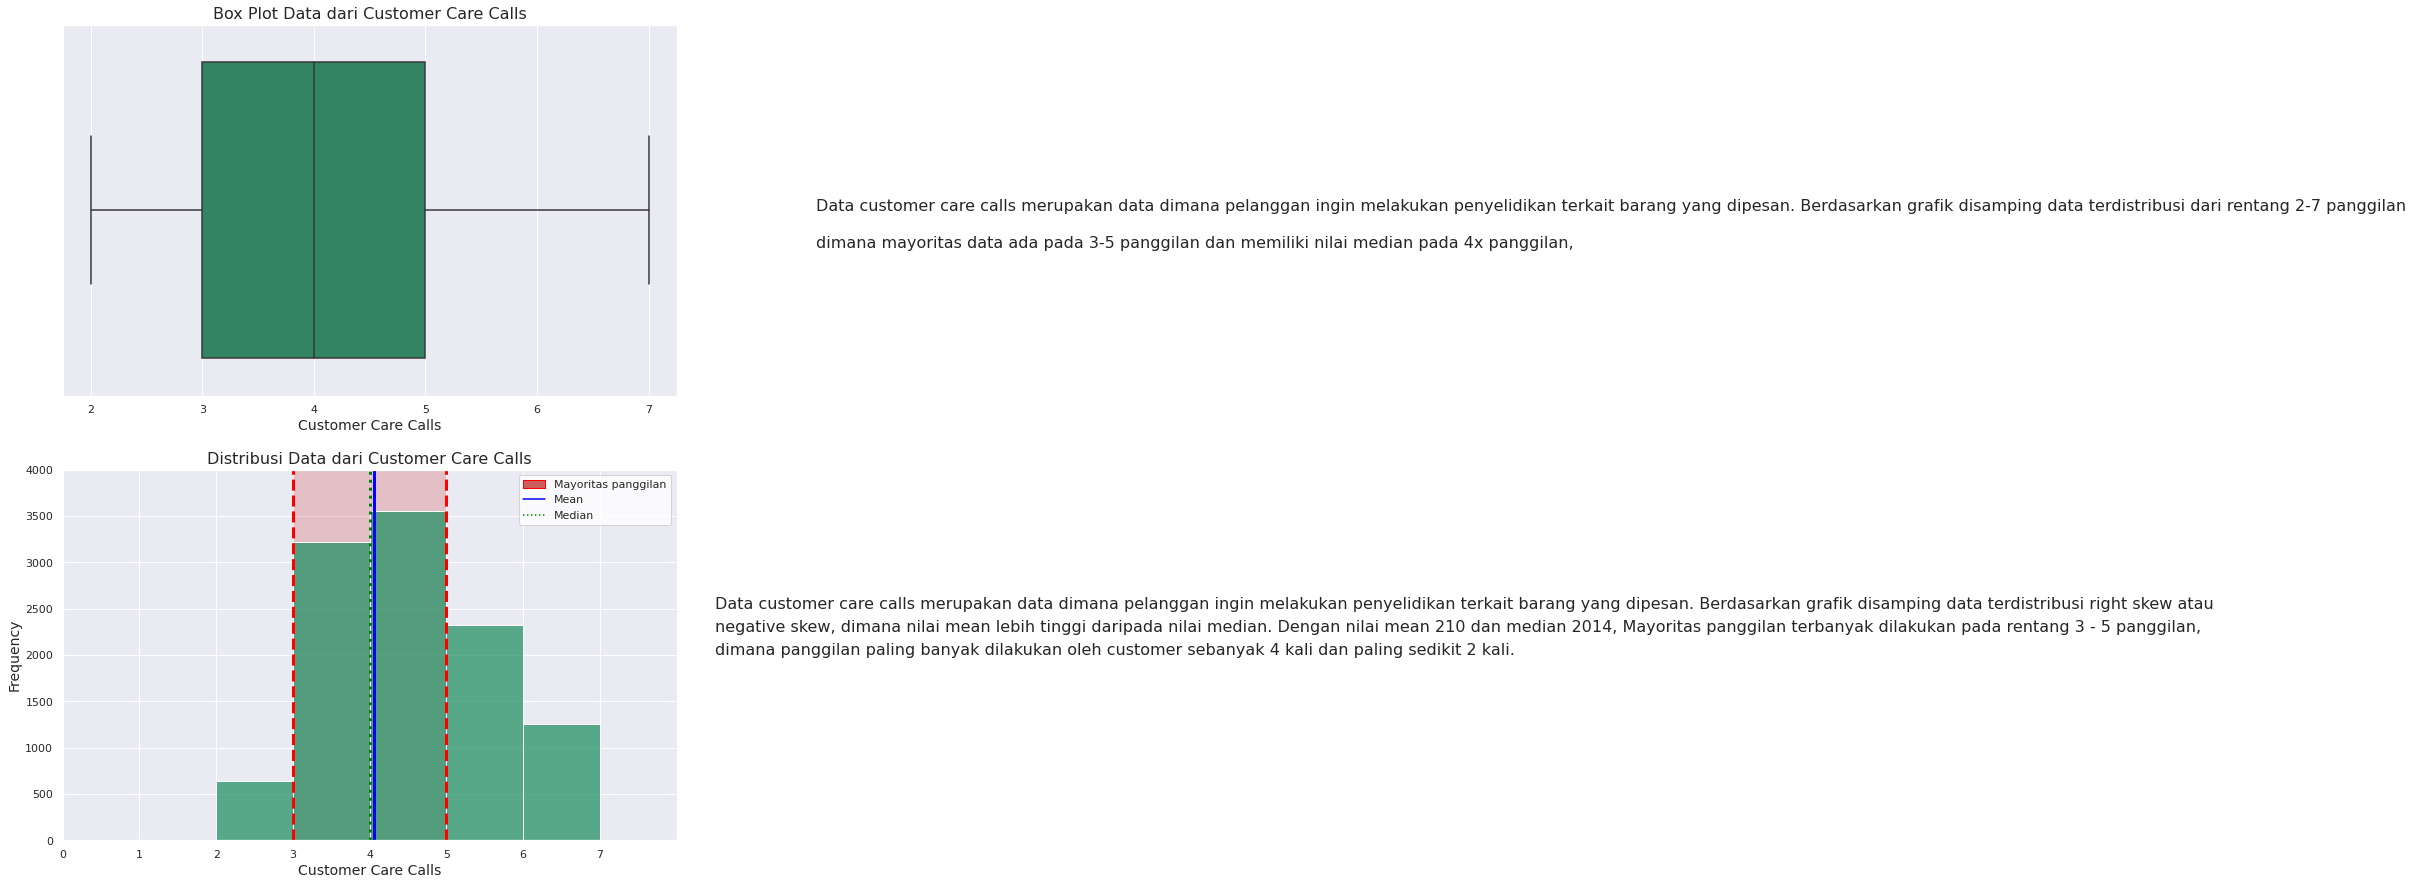

In [ ]:

fig, ax = plt.subplots(2, 1, figsize=(11,15))
sns.boxplot(ax=ax[0],data=df, x='Customer_care_calls')
ax[0].set_title('Box Plot Data dari Customer Care Calls', fontsize=16)
ax[0].set_xlabel('Customer Care Calls', fontsize=14)
ax[0].text(x=8.5,y=0, s='Data customer care calls merupakan data dimana pelanggan ingin melakukan penyelidikan terkait barang yang dipesan. Berdasarkan grafik disamping data terdistribusi dari rentang 2-7 panggilan' ,fontsize=16)
ax[0].text(x=8.5,y= 0.1,s='dimana mayoritas data ada pada 3-5 panggilan dan memiliki nilai median pada 4x panggilan, ' ,fontsize=16)



#nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered','Weight_in_gms']

sns.histplot(ax=ax[1],data=df, x='Customer_care_calls',binwidth=1)
ax[1].set_title('Distribusi Data dari Customer Care Calls', fontsize=16)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].set_xlabel('Customer Care Calls',fontsize=14)
ax[1].set_ylim(0,4000)
ax[1].set_xlim(1,8) 
ax[1].set_xticks(np.arange(0,8,1))
ax[1].stackplot(np.arange(3, 6,1), [[4000]], colors=('indianred',), alpha=0.3)
ax[1].axvline(x=3, color='red', linestyle='--', linewidth=3)
ax[1].axvline(x=5, color='red', linestyle='--', linewidth=3)
ax[1].axvline(x=np.mean(df['Customer_care_calls']), color='blue', linestyle='solid', linewidth=3)
ax[1].axvline(x=np.median(df['Customer_care_calls']), color='green', linestyle='dotted', linewidth=3)
ax[1].text(x=8.5,y=2500, s='Data customer care calls merupakan data dimana pelanggan ingin melakukan penyelidikan terkait barang yang dipesan. Berdasarkan grafik disamping data terdistribusi right skew atau ' ,fontsize=16)
ax[1].text(x=8.5,y= 2250,s='negative skew, dimana nilai mean lebih tinggi daripada nilai median. Dengan nilai mean 210 dan median 2014, Mayoritas panggilan terbanyak dilakukan pada rentang 3 - 5 panggilan, ' ,fontsize=16)
ax[1].text(x=8.5,y= 2000, s='dimana panggilan paling banyak dilakukan oleh customer sebanyak 4 kali dan paling sedikit 2 kali. ',fontsize=16)

legend_elements = [Patch(facecolor='indianred', edgecolor='r',
                         label='Mayoritas panggilan'),
                   Line2D([0], [0], ls='solid', color='blue', label='Mean',
                          markerfacecolor='g', markersize=15),
                   Line2D([0], [1], ls='dotted', color='green', label='Median',
                          markerfacecolor='g', markersize=15),]
ax[1].legend(handles=legend_elements, loc='upper right',frameon=True, facecolor='White')


plt.show()

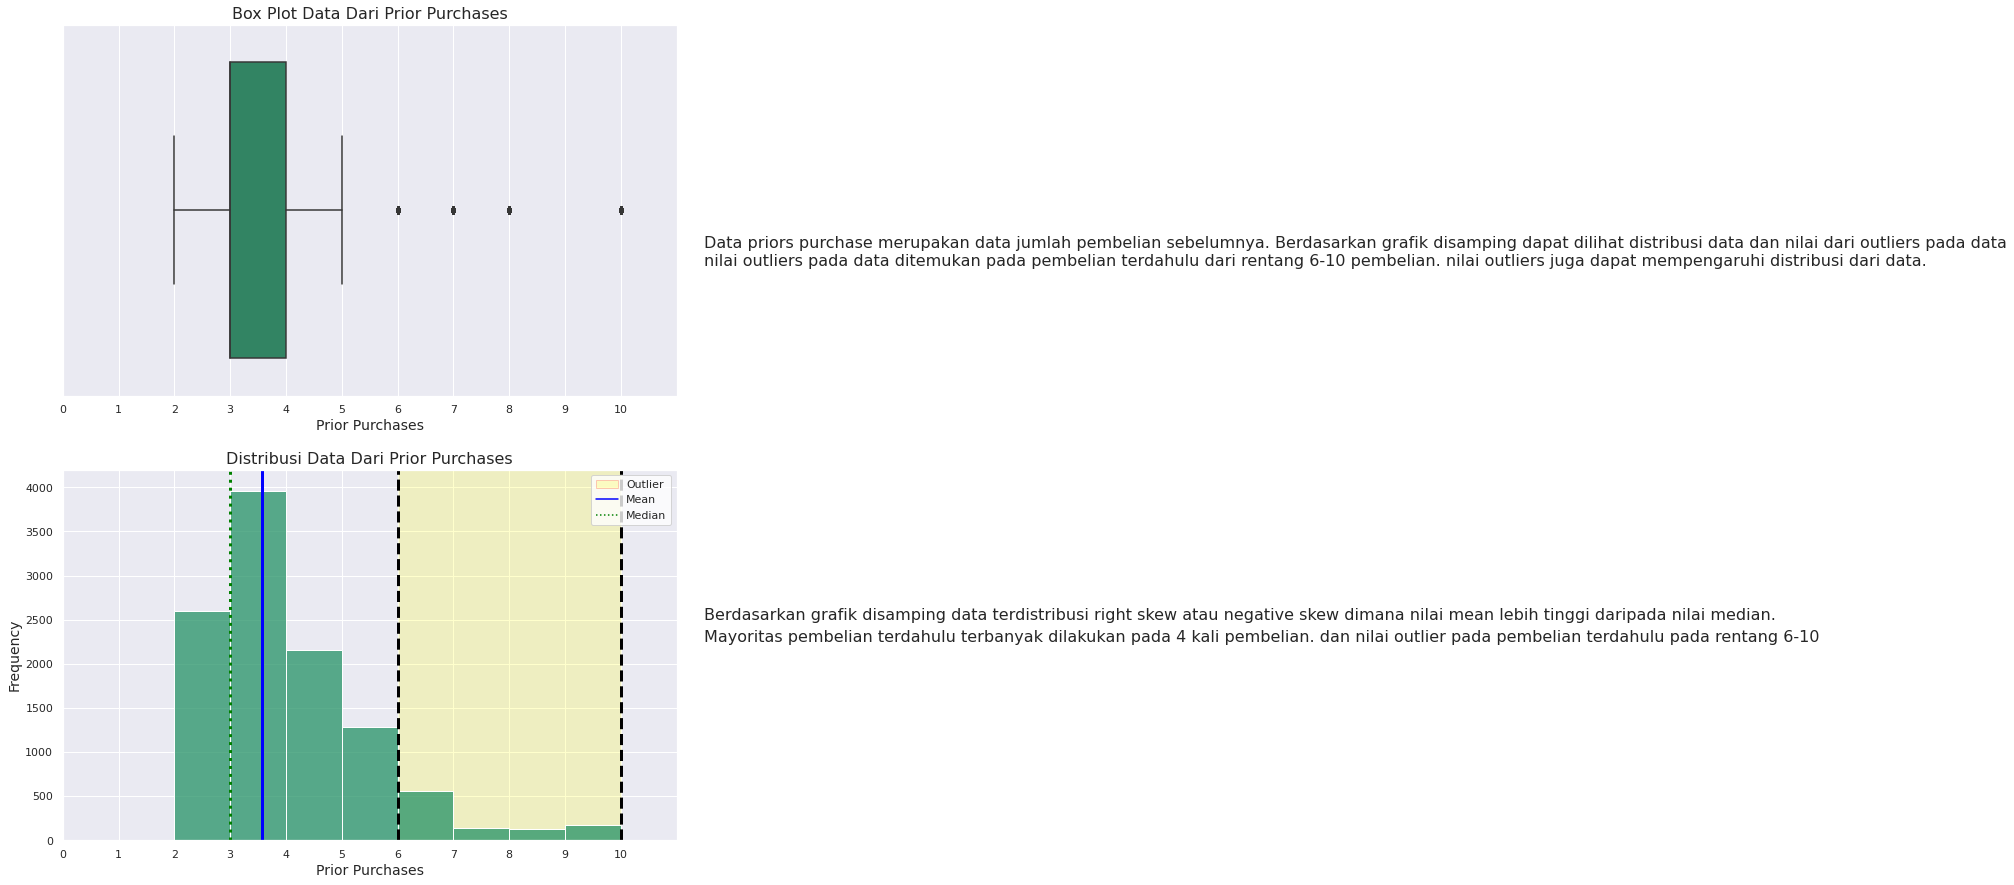

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(11,15))
sns.boxplot(ax=ax[0],data=df, x='Prior_purchases')
ax[0].set_title('Box Plot Data Dari Prior Purchases', fontsize=16)
ax[0].set_xlabel('Prior Purchases', fontsize=14)
ax[0].set_xlim(0,11)
ax[0].set_xticks(np.arange(0,11,1))
ax[0].text(x=11.5,y=0.1, s='Data priors purchase merupakan data jumlah pembelian sebelumnya. Berdasarkan grafik disamping dapat dilihat distribusi data dan nilai dari outliers pada data' ,fontsize=16)
ax[0].text(x=11.5,y= 0.15,s='nilai outliers pada data ditemukan pada pembelian terdahulu dari rentang 6-10 pembelian. nilai outliers juga dapat mempengaruhi distribusi dari data.' ,fontsize=16)



#nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered','Weight_in_gms']

sns.histplot(ax=ax[1],data=df, x='Prior_purchases',binwidth=1)
ax[1].set_title('Distribusi Data Dari Prior Purchases', fontsize=16)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].set_xlim(0,11)
ax[1].set_ylim(0,4200)
ticks = np.arange(0, 11,1)
ax[1].set_xticks(ticks)
ax[1].set_xlabel('Prior Purchases',fontsize=14)

ax[1].stackplot(np.arange(6, 11,1), [[4200]], colors=('yellow',), alpha=0.2)
ax[1].axvline(x=6, color='black', linestyle='--', linewidth=3)
ax[1].axvline(x=10, color='black', linestyle='--', linewidth=3)
ax[1].axvline(x=np.mean(df['Prior_purchases']), color='blue', linestyle='solid', linewidth=3)
ax[1].axvline(x=np.median(df['Prior_purchases']), color='green', linestyle='dotted', linewidth=3)
ax[1].text(x=11.5,y=2500, s='Berdasarkan grafik disamping data terdistribusi right skew atau negative skew dimana nilai mean lebih tinggi daripada nilai median.' ,fontsize=16)
ax[1].text(x=11.5,y= 2250,s='Mayoritas pembelian terdahulu terbanyak dilakukan pada 4 kali pembelian. dan nilai outlier pada pembelian terdahulu pada rentang 6-10' ,fontsize=16)


legend_elements = [Patch(facecolor='yellow', edgecolor='r',
                         label='Outlier',alpha=0.2),
                   Line2D([0], [0], ls='solid', color='blue', label='Mean',
                          markerfacecolor='g', markersize=15),
                   Line2D([0], [1], ls='dotted', color='green', label='Median',
                          markerfacecolor='g', markersize=15),]
ax[1].legend(handles=legend_elements, loc='upper right',frameon=True,facecolor='White')


plt.show()

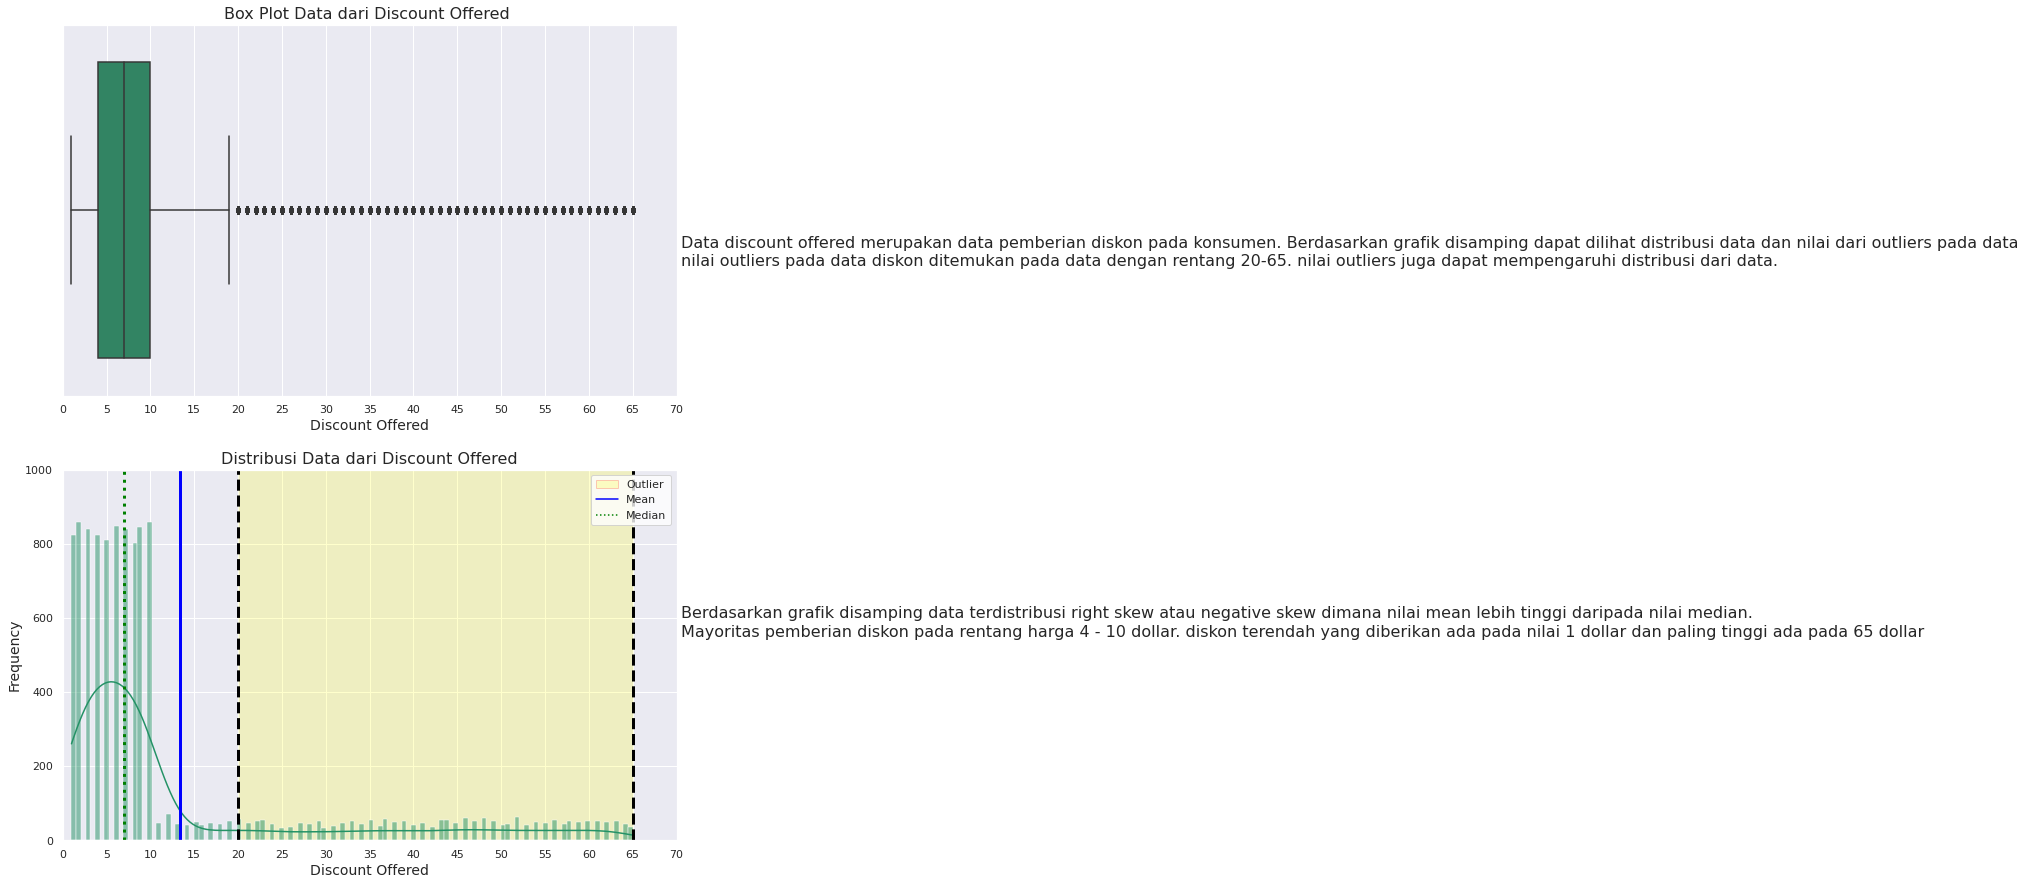

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(11,15))
sns.boxplot(ax=ax[0],data=df, x='Discount_offered')
ax[0].set_title('Box Plot Data dari Discount Offered ', fontsize=16)
ax[0].set_xlabel('Discount Offered', fontsize=14)
ax[0].set_xlim(0,70)
ax[0].set_xticks(np.arange(0,71,5))

ax[0].text(x=70.5,y=0.1, s='Data discount offered merupakan data pemberian diskon pada konsumen. Berdasarkan grafik disamping dapat dilihat distribusi data dan nilai dari outliers pada data' ,fontsize=16)
ax[0].text(x=70.5,y= 0.15,s='nilai outliers pada data diskon ditemukan pada data dengan rentang 20-65. nilai outliers juga dapat mempengaruhi distribusi dari data.' ,fontsize=16)




#nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered','Weight_in_gms']

sns.histplot(ax=ax[1],data=df['Discount_offered'],kde=True)
ax[1].set_title('Distribusi Data dari Discount Offered', fontsize=16)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].set_xlabel('Discount Offered',fontsize=14)
ax[1].set_xlim(0,70)
ax[1].set_ylim(0,1000)
ax[1].set_xticks(np.arange(0,71,5))

ax[1].stackplot(np.arange(20, 66,1), [[1000]], colors=('yellow',), alpha=0.2)
ax[1].axvline(x=20, color='black', linestyle='--', linewidth=3)
ax[1].axvline(x=65, color='black', linestyle='--', linewidth=3)
ax[1].text(x=70.5,y=600, s='Berdasarkan grafik disamping data terdistribusi right skew atau negative skew dimana nilai mean lebih tinggi daripada nilai median.' ,fontsize=16)
ax[1].text(x=70.5,y=550,s='Mayoritas pemberian diskon pada rentang harga 4 - 10 dollar. diskon terendah yang diberikan ada pada nilai 1 dollar dan paling tinggi ada pada 65 dollar ' ,fontsize=16)
ax[1].axvline(x=np.mean(df['Discount_offered']), color='blue', linestyle='solid', linewidth=3)
ax[1].axvline(x=np.median(df['Discount_offered']), color='green', linestyle='dotted', linewidth=3)

legend_elements = [Patch(facecolor='yellow', edgecolor='r',
                         label='Outlier',alpha=0.2),
                   Line2D([0], [0], ls='solid', color='blue', label='Mean',
                          markerfacecolor='g', markersize=15),
                   Line2D([0], [1], ls='dotted', color='green', label='Median',
                          markerfacecolor='g', markersize=15),]
ax[1].legend(handles=legend_elements, loc='upper right',frameon=True,facecolor='White')


plt.show()

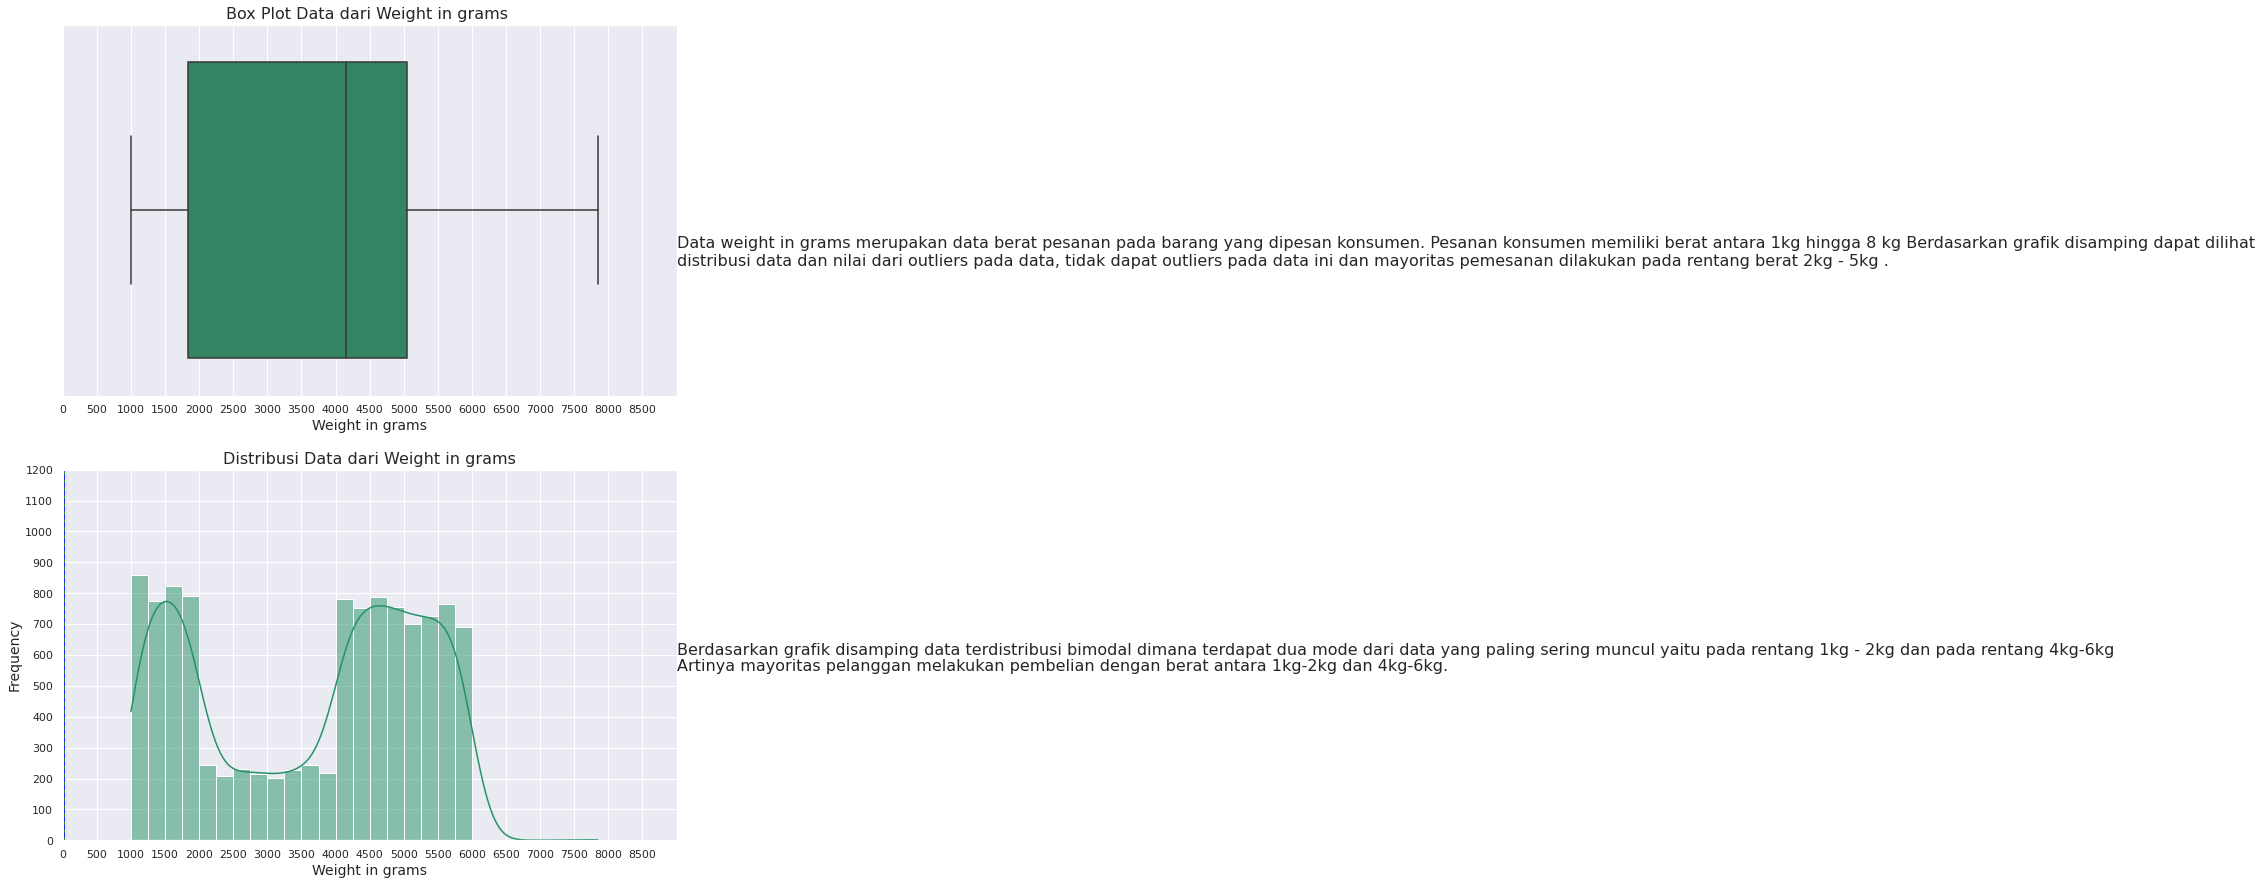

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(11,15))
sns.boxplot(ax=ax[0],data=df, x='Weight_in_gms')
ax[0].set_title('Box Plot Data dari Weight in grams ', fontsize=16)
ax[0].set_xlabel('Weight in grams', fontsize=14)
ax[0].text(x=9000.5,y=0.1, s='Data weight in grams merupakan data berat pesanan pada barang yang dipesan konsumen. Pesanan konsumen memiliki berat antara 1kg hingga 8 kg Berdasarkan grafik disamping dapat dilihat ' ,fontsize=16)
ax[0].text(x=9000.5,y= 0.15,s='distribusi data dan nilai dari outliers pada data, tidak dapat outliers pada data ini dan mayoritas pemesanan dilakukan pada rentang berat 2kg - 5kg .' ,fontsize=16)
ax[0].set_xlim(0,9000)
ax[0].set_xticks(np.arange(0,9000,500))



#nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered','Weight_in_gms']

sns.histplot(ax=ax[1],data=df['Weight_in_gms'],binwidth=250,kde=True)
ax[1].set_title('Distribusi Data dari Weight in grams', fontsize=16)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].set_xlabel('Weight in grams',fontsize=14)
ax[1].set_xlim(0,9000)
ax[1].set_xticks(np.arange(0,9000,500))
ax[1].set_ylim(0,1200)
ax[1].set_yticks(np.arange(0,1300,100))


#ax[1].stackplot(np.arange(20, 66,1), [[1000]], colors=('yellow',), alpha=0.2)
#ax[1].axvline(x=20, color='black', linestyle='--', linewidth=3)
#ax[1].axvline(x=65, color='black', linestyle='--', linewidth=3)
ax[1].text(x=9000.5,y=600, s='Berdasarkan grafik disamping data terdistribusi bimodal dimana terdapat dua mode dari data yang paling sering muncul yaitu pada rentang 1kg - 2kg dan pada rentang 4kg-6kg' ,fontsize=16)
ax[1].text(x=9000.5,y=550,s='Artinya mayoritas pelanggan melakukan pembelian dengan berat antara 1kg-2kg dan 4kg-6kg.' ,fontsize=16)
ax[1].axvline(x=np.mean(df['Prior_purchases']), color='blue', linestyle='solid', linewidth=3)
ax[1].axvline(x=np.median(df['Prior_purchases']), color='green', linestyle='dotted', linewidth=3)



plt.show()

# Multivariate Analysis

# Plotting Kurva Numerical - Numerical

# Heatmap

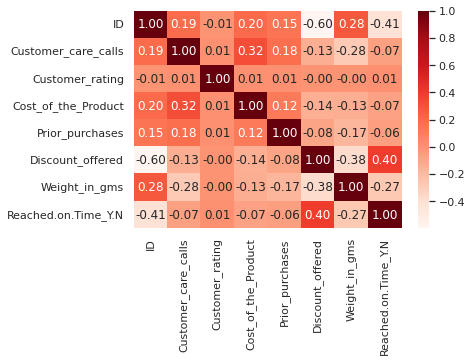

In [ ]:
sns.heatmap(df.corr('pearson'), cmap='Reds', annot=True, fmt='.2f')

## Berdasarkan Heatmap, customer rating tidak memiliki korelasi dengan kolom apapun (fitur) sehingga tidak dapat digunakan model linear

melainkan pada kolom lain yaitu customer care calls dan reached on time (masih relate dengan problem) 

Pada dua fitur ini ditemukan korelasi berturut-turut:

1. Reached on Time dengan hampir seluruh fitur, contohnya (diurutkan dari yang paling kuat) :

>>a. Weight in gms (korelasi negatif) 

>>b. Discount Offered (korelasi positif) 

2. Customer Care Calls dengan hampir seluruh fitur, contohnya (diurutkan dari yang paling kuat:

>>a. Cost of Products (korelasi positif) 

>>b. Weight in gms (korelasi negatif) 

>>c. Prior Purchases (korelasi positif) 

>>d. Discount Offered (korelasi negatif) 


Disini terjadi keanehan data yaitu adanya korelasi antara ID dengan kolom lain.

In [ ]:
df.corr()

ID  Customer_care_calls  Customer_rating  \
ID                   1.000000             0.188998        -0.005722   
Customer_care_calls  0.188998             1.000000         0.012209   
Customer_rating     -0.005722             0.012209         1.000000   
Cost_of_the_Product  0.196791             0.323182         0.009270   
Prior_purchases      0.145369             0.180771         0.013179   
Discount_offered    -0.598278            -0.130750        -0.003124   
Weight_in_gms        0.278312            -0.276615        -0.001897   
Reached.on.Time_Y.N -0.411822            -0.067126         0.013119   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
ID                              0.196791         0.145369         -0.598278   
Customer_care_calls             0.323182         0.180771         -0.130750   
Customer_rating                 0.009270         0.013179         -0.003124   
Cost_of_the_Product             1.000000         0.123676         -0.138312   
Prior_purchases                 0.123676         1.000000         -0.082769   
Discount_offered               -0.138312        -0.082769          1.000000   
Weight_in_gms                  -0.132604        -0.168213         -0.376067   
Reached.on.Time_Y.N            -0.073587        -0.055515          0.397108   

                     Weight_in_gms  Reached.on.Time_Y.N  
ID                        0.278312            -0.411822  
Customer_care_calls      -0.276615            -0.067126  
Customer_rating          -0.001897             0.013119  
Cost_of_the_Product      -0.132604            -0.073587  
Prior_purchases          -0.168213            -0.055515  
Discount_offered         -0.376067             0.397108  
Weight_in_gms             1.000000            -0.268793  
Reached.on.Time_Y.N      -0.268793             1.000000

## Pair Plot

Gambaran Umum:

- Data yang tersebar merata (tidak terlihat terkumpul) maka dapat dinilai tidak ada korelasi antar dua fitur numerical. 

- Untuk lebih jelasnya menggunakan "hue" untuk Reached On Time pada Pair Plot II

- Korelasi terlihat dari antar numerical berdasarkan Pair Plot ada pada:
 1. Cost of Product dengan Discount Offered

 2. Cost of Product dengan Weight gms

 3. Discount Offered dengan Prior Purchases

 4. Prior Purchases dengan Weight gms

 5. Discount Offered dengan seluruh Categorical

 6. Weight gms dengan seluruh categorical

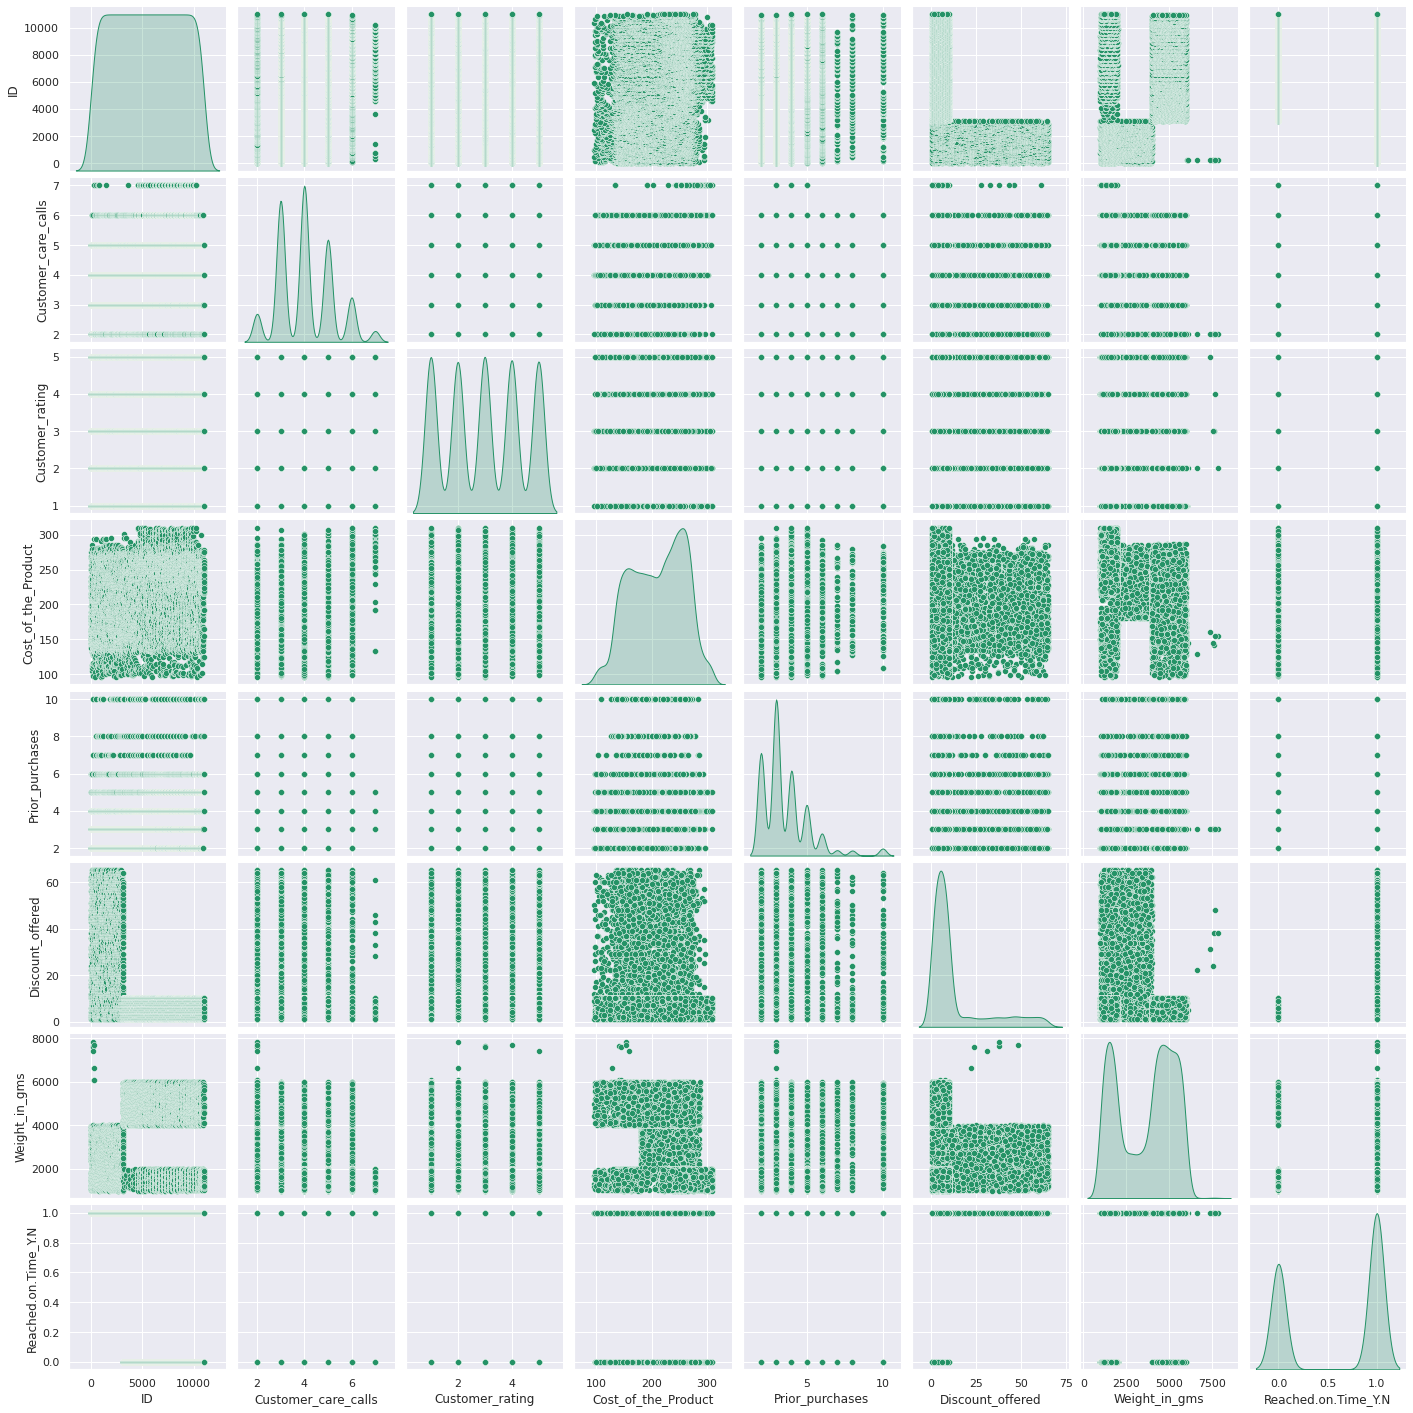

In [ ]:

#Pair Plot I:
sns.pairplot(df, diag_kind='kde', palette='summer')

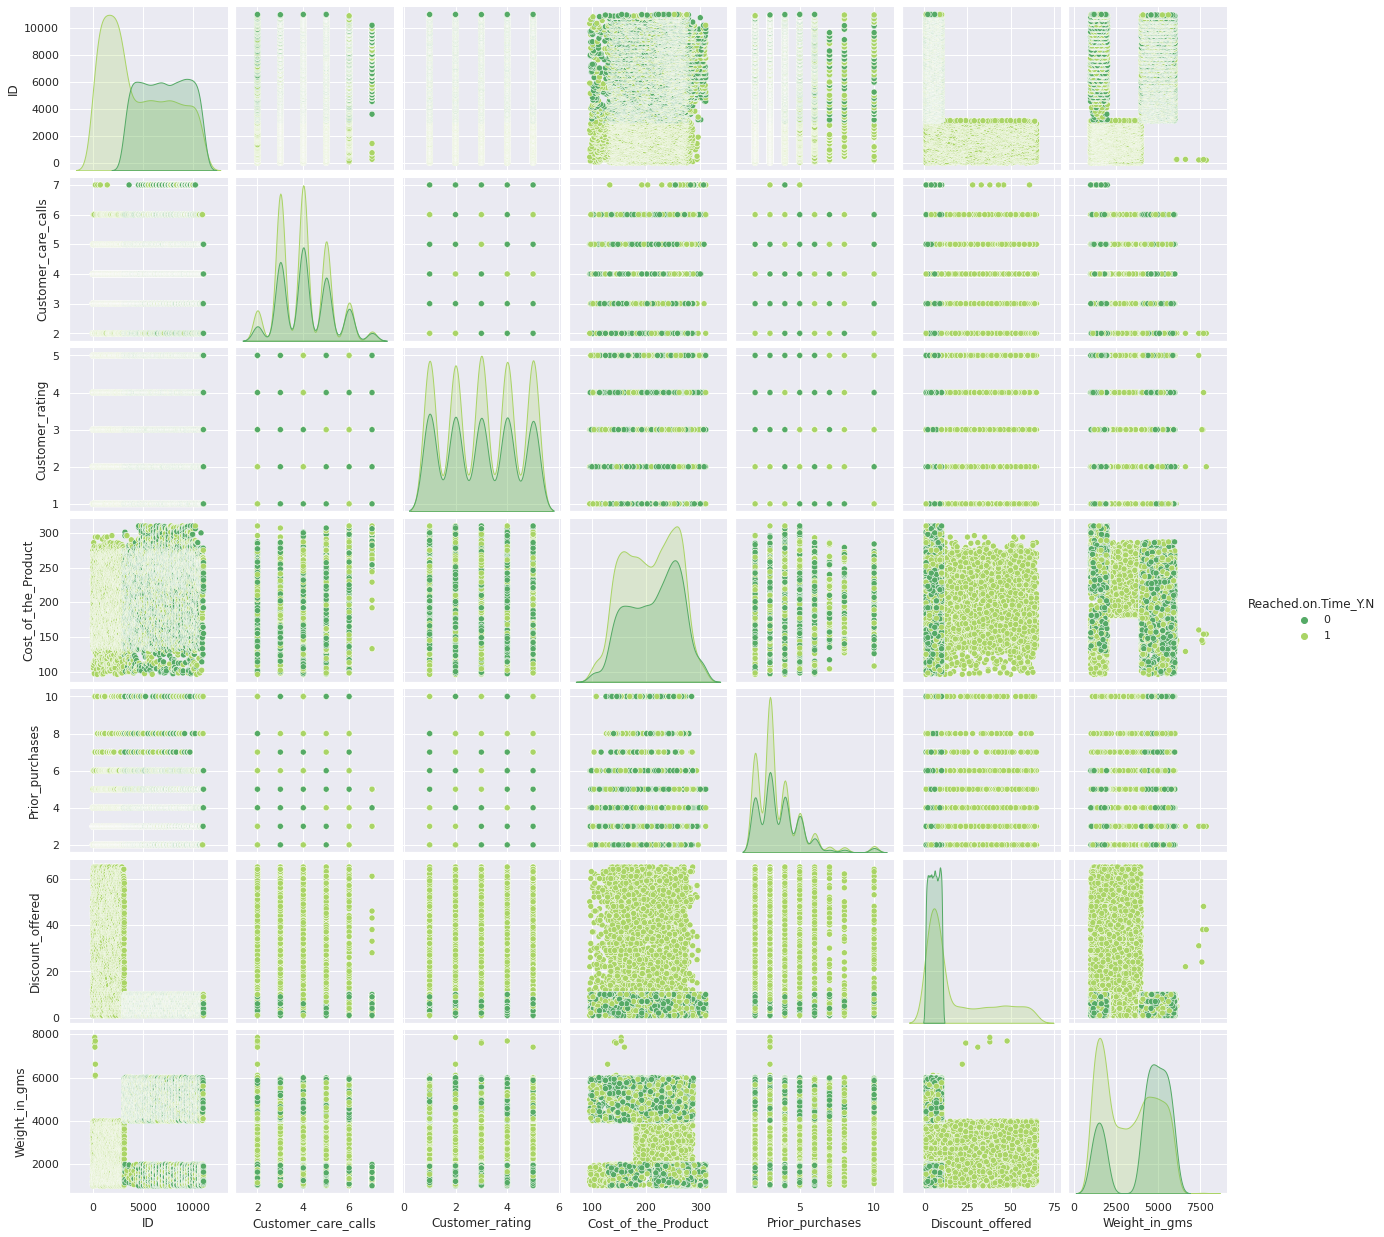

In [ ]:

#Pair Plot II:
sns.pairplot(df, diag_kind='kde',
            hue='Reached.on.Time_Y.N',palette='summer')

## Plotting Kurva Categorical dan Numerical


Gambaran Umum:

Korelasi terjadi pada:
- Reached On Time - Discount Offeres

>>Ada perbedaan nilai Discount Offered yang signifikan diantara "0" dan "1" pada kurva Reached on Time dengan Discount Offered 

- Reached On Time - Weight gms

>>Ada perbedaan nilai weight gms diantara "0" dan "1' pada kurva Reached On Time dengan Weight gms.

In [ ]:

# Sebelumnya kita ingat

cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered','Weight_in_gms']


 Kurva Kolom Warehouse Block - Numerical

> Di setiap Block Warehouse memiliki nilai yang sama (pola persebaran datanya sama) pada setiap fitur numericalnya sehingga dapat dianggap tidak ada korelasi diantara keduanya

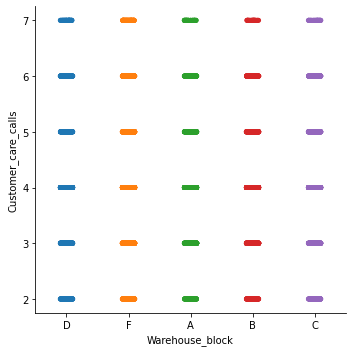

In [ ]:
sns.catplot (data=df, x='Warehouse_block',y='Customer_care_calls')

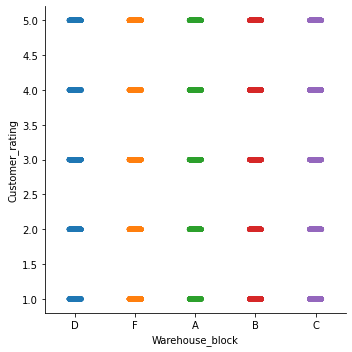

In [ ]:
sns.catplot (data=df, x='Warehouse_block',y='Customer_rating')

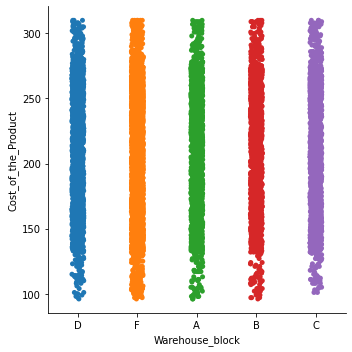

In [ ]:
sns.catplot (data=df, x='Warehouse_block',y='Cost_of_the_Product')

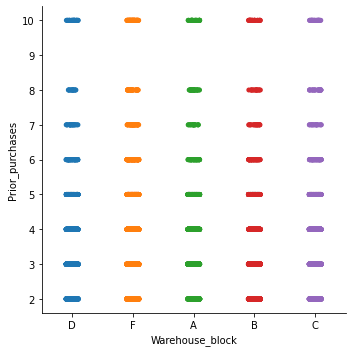

In [ ]:
sns.catplot (data=df, x='Warehouse_block',y='Prior_purchases')

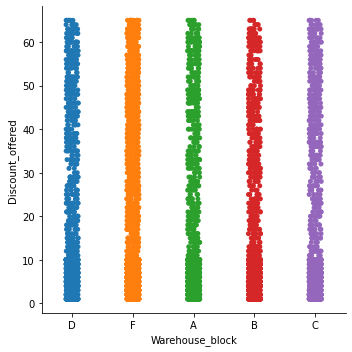

In [ ]:
sns.catplot (data=df, x='Warehouse_block',y='Discount_offered')

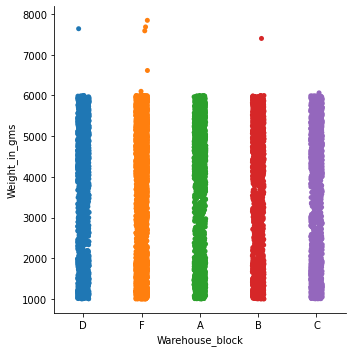

In [ ]:
sns.catplot (data=df, x='Warehouse_block',y='Weight_in_gms')

Kurva Kolom Mode of Shipment- Numerical

> Di setiap jenis Mode of Shipment memiliki nilai yang sama (pola persebaran datanya sama) pada setiap fitur numericalnya sehingga dapat dianggap tidak ada korelasi diantara keduanya

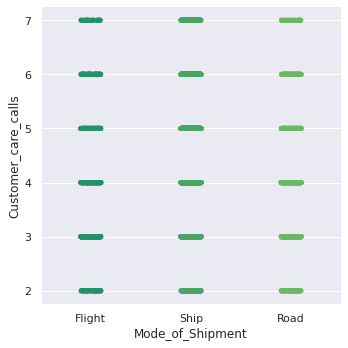

In [ ]:
sns.catplot (data=df, x='Mode_of_Shipment',y='Customer_care_calls')

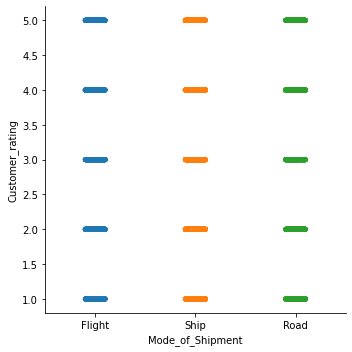

In [ ]:
sns.catplot (data=df, x='Mode_of_Shipment',y='Customer_rating')

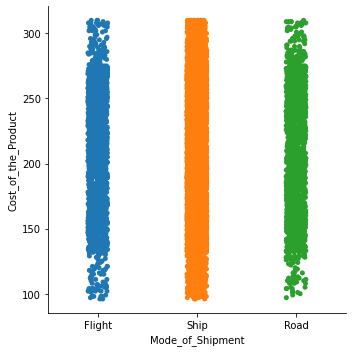

In [ ]:
sns.catplot (data=df, x='Mode_of_Shipment',y='Cost_of_the_Product')

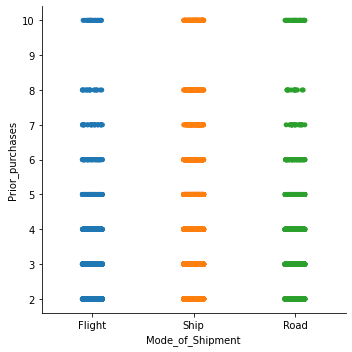

In [ ]:
sns.catplot (data=df, x='Mode_of_Shipment',y='Prior_purchases')

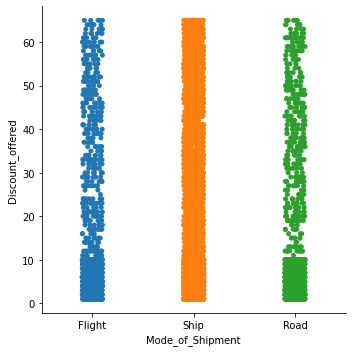

In [ ]:
sns.catplot (data=df, x='Mode_of_Shipment',y='Discount_offered')

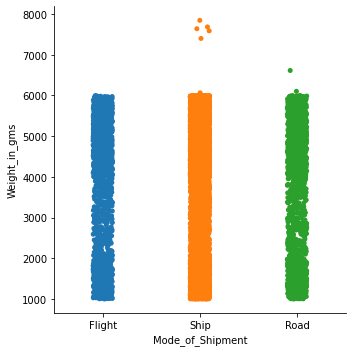

In [ ]:
sns.catplot (data=df, x='Mode_of_Shipment',y='Weight_in_gms')

Plotting Kurva Product Importance dan Numerical
> Di setiap jenis Product (Low, Medium, High) jumlah Customer care calls untuk setiap jenis Product Importance memiliki nilai yang sama sehingga dapat dianggap tidak ada korelasi diantara keduanya

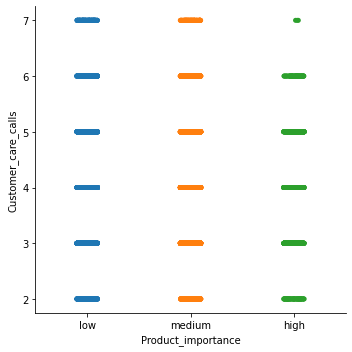

In [ ]:
sns.catplot (data=df, x='Product_importance',y='Customer_care_calls')

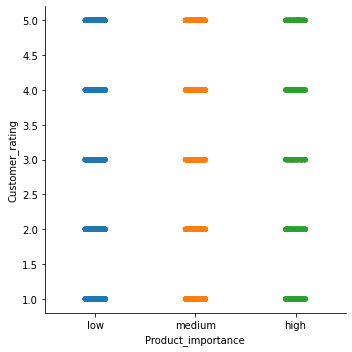

In [ ]:
sns.catplot (data=df, x='Product_importance',y='Customer_rating')

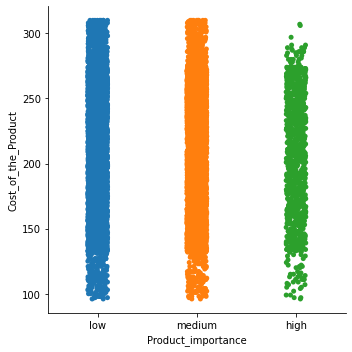

In [ ]:
sns.catplot (data=df, x='Product_importance',y='Cost_of_the_Product')

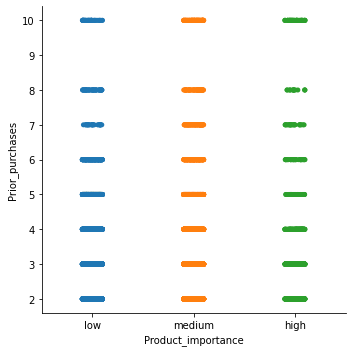

In [ ]:
sns.catplot (data=df, x='Product_importance',y='Prior_purchases')

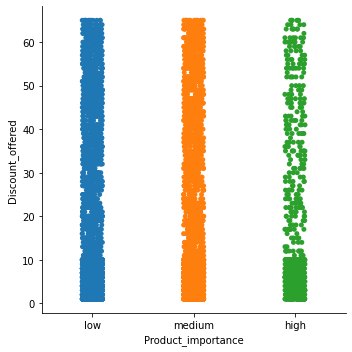

In [ ]:
sns.catplot (data=df, x='Product_importance',y='Discount_offered')

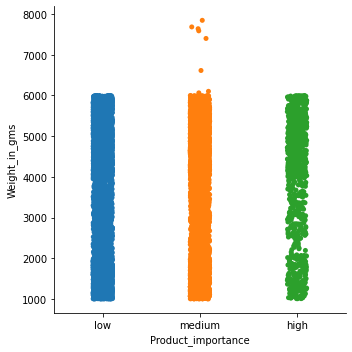

In [ ]:
sns.catplot (data=df, x='Product_importance',y='Weight_in_gms')


Plotting Kurva Gender - Numerical
> Di setiap Gender (M dan F) memiliki nilai yang sama (pola persebaran datanya sama) pada setiap fitur numericalnya sehingga dapat dianggap tidak ada korelasi diantara keduanya

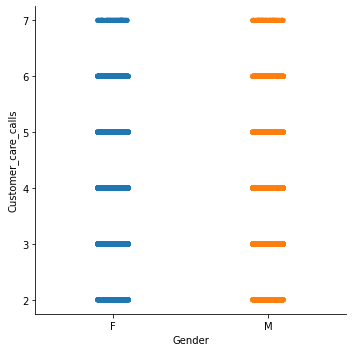

In [ ]:
sns.catplot (data=df, x='Gender',y='Customer_care_calls')

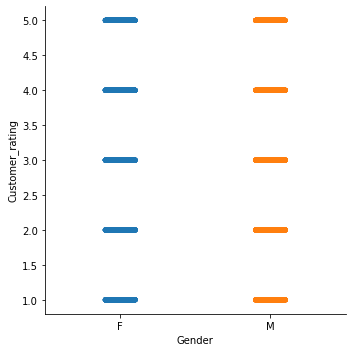

In [ ]:
sns.catplot (data=df, x='Gender',y='Customer_rating')

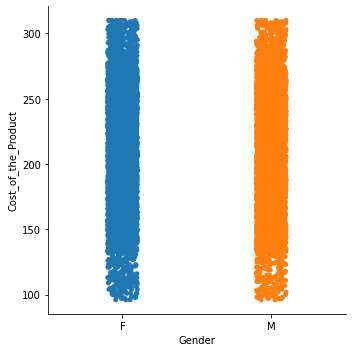

In [ ]:
sns.catplot (data=df, x='Gender',y='Cost_of_the_Product')

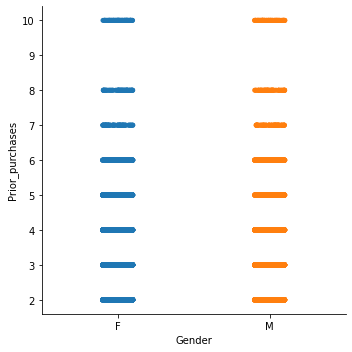

In [ ]:
sns.catplot (data=df, x='Gender',y='Prior_purchases')

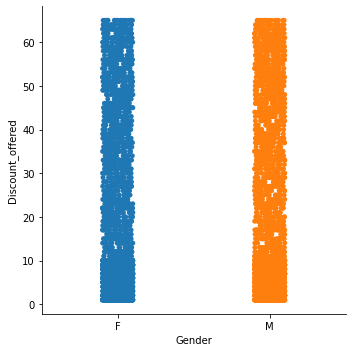

In [ ]:
sns.catplot (data=df, x='Gender',y='Discount_offered')

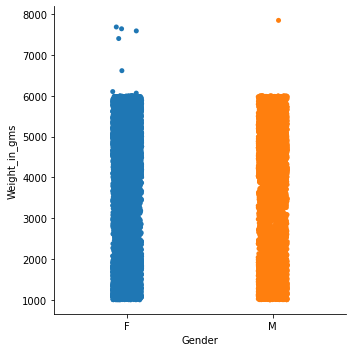

In [ ]:
sns.catplot (data=df, x='Gender',y='Weight_in_gms')

Plotting Kurva Reached On Time - Numerical

> Nilai Discount Offer untuk Reached On Time "0" dengan Discount Offer untuk Reached on Time "1" berbeda. 

> Nilai Weight gms untuk Reached On Time  "0" dengan Weight gms untuk Reached On Time "1" berbeda. 

Sehingga dapat disimpulkan ada korelasi diantara:

1. Reached On Time dengan Discount Offer
2. Reached On Time dengan Weight gms

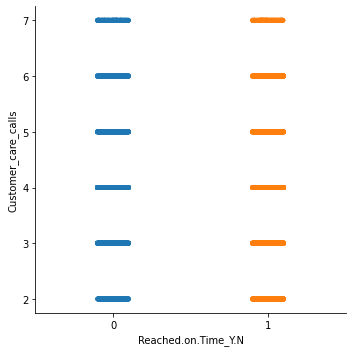

In [ ]:
sns.catplot (data=df, x='Reached.on.Time_Y.N',y='Customer_care_calls')

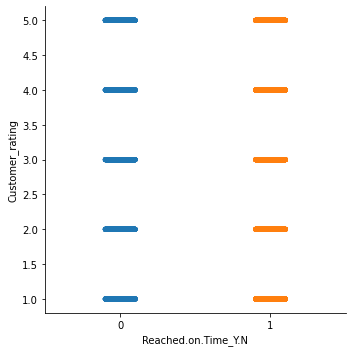

In [ ]:
sns.catplot (data=df, x='Reached.on.Time_Y.N',y='Customer_rating')

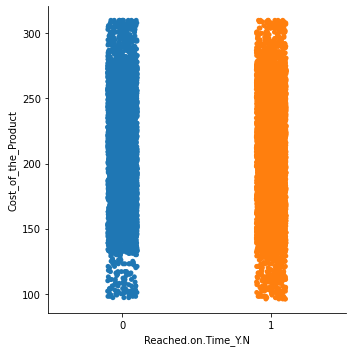

In [ ]:
sns.catplot (data=df, x='Reached.on.Time_Y.N',y='Cost_of_the_Product')

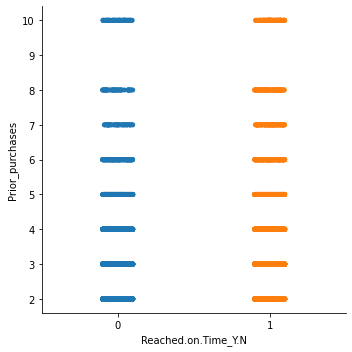

In [ ]:
sns.catplot (data=df, x='Reached.on.Time_Y.N',y='Prior_purchases')

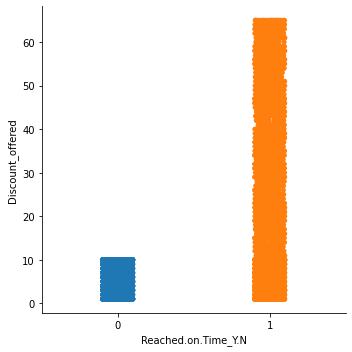

In [ ]:
sns.catplot (data=df, x='Reached.on.Time_Y.N',y='Discount_offered')

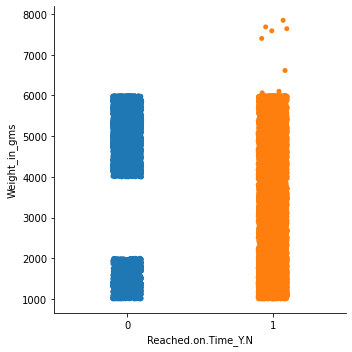

In [ ]:
sns.catplot (data=df, x='Reached.on.Time_Y.N',y='Weight_in_gms')


# Plotting Antara 2 Categorical

Setelah melakukan Plotting, diperoleh:

- Adanya korelasi antara kedua Categorical yang ditandai adanya perbedaan warna (hijau muda dan hijau tua) :

1. Warehouse Block dengan fitur categorical lainnya yang ditunjukkan dengan tiap Block Warehouse (D, F, A, B, C) yang mana memiliki perbedaan warna. 

2. Begitupula dengan Product Importance, Mode of Shipment, dan Reached On Time saling berkorelasi kecuali Gender

Note: Diberikan grafik tambahan untuk Reached on Time dengan fitur categorical lainnya.

In [ ]:

# Sebelumnya kita ingat

cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered','Weight_in_gms']

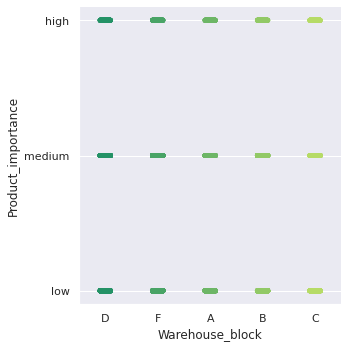

In [ ]:
sns.catplot (data=df, x='Warehouse_block',y='Product_importance')

Kurva Warehouse dengan Product Importance

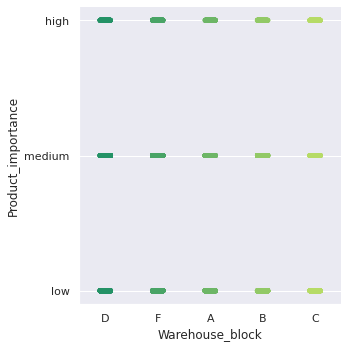

In [ ]:
sns.catplot (data=df, x='Warehouse_block',y='Product_importance')

Kurva Warehouse dengan Gender

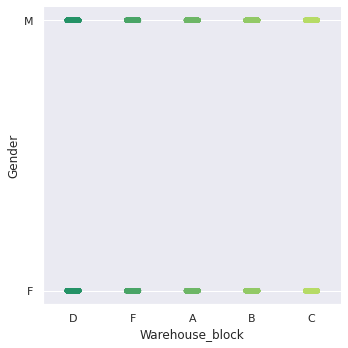

In [ ]:
sns.catplot (data=df, x='Warehouse_block',y='Gender')

Kurva Warehouse dengan Reached On Time

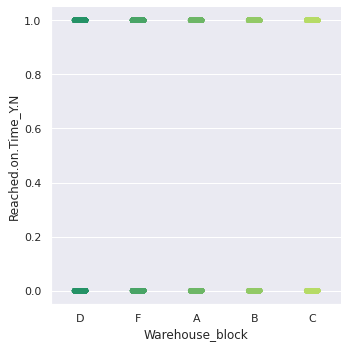

In [ ]:
sns.catplot (data=df, x='Warehouse_block',y='Reached.on.Time_Y.N')

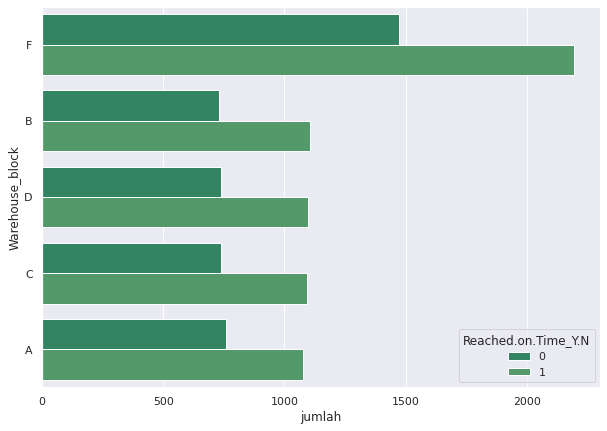

In [ ]:

#Lebih detail tentang Kurva Warehouse Block dengan Reached On Time

plt.figure(figsize = (10,7))
df_group= df.groupby(['Warehouse_block','Reached.on.Time_Y.N'])['ID'].nunique().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False) 
sns.barplot(data=df_group, x='jumlah',y='Warehouse_block', hue='Reached.on.Time_Y.N')

Kurva Mode Of Shipment dengan Product Importance

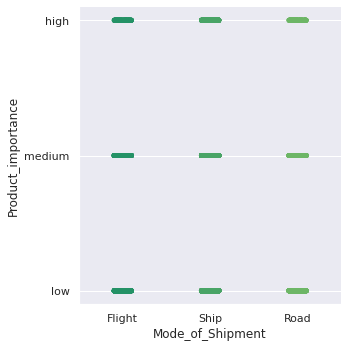

In [ ]:
sns.catplot (data=df, x='Mode_of_Shipment',y='Product_importance')

Kurva Mode Of Shipment dengan Gender

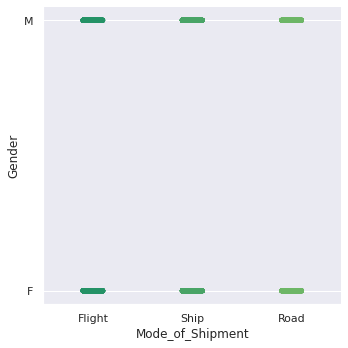

In [ ]:
sns.catplot(data=df, x='Mode_of_Shipment',y='Gender')

Kurva Mode Of Shipment dengan Reached On Time

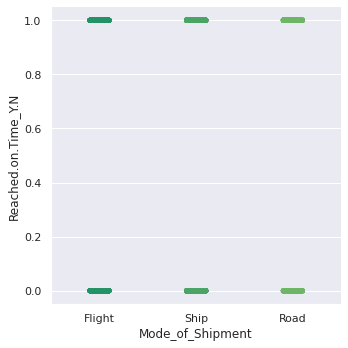

In [ ]:


sns.catplot (data=df, x='Mode_of_Shipment',y='Reached.on.Time_Y.N')

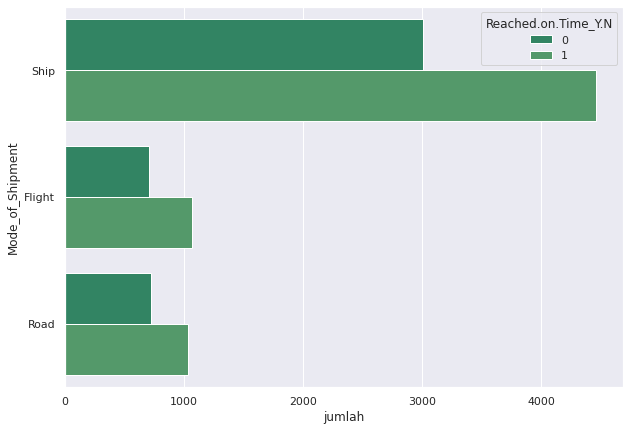

In [ ]:

#Kurva detail Mode of Shipment dengan Reached on Time

plt.figure(figsize = (10,7))
df_group2= df.groupby(['Mode_of_Shipment','Reached.on.Time_Y.N'])['ID'].nunique().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
sns.barplot(data=df_group2, x='jumlah',y='Mode_of_Shipment', hue='Reached.on.Time_Y.N')

Kurva Product of Importance dengan Reached On Time

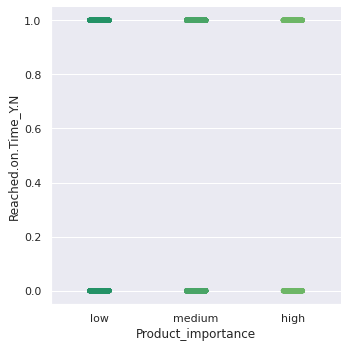

In [ ]:
sns.catplot (data=df, x='Product_importance',y='Reached.on.Time_Y.N')

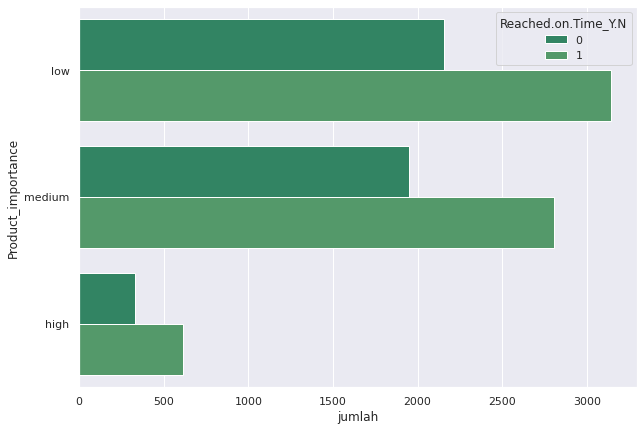

In [ ]:

#Kurva detail Product Importance dengan Reached on Time

plt.figure(figsize = (10,7))
df_group3= df.groupby(['Product_importance','Reached.on.Time_Y.N'])['ID'].nunique().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
sns.barplot(data=df_group3, x='jumlah',y='Product_importance', hue='Reached.on.Time_Y.N')

Kurva Product Importance dengan Gender

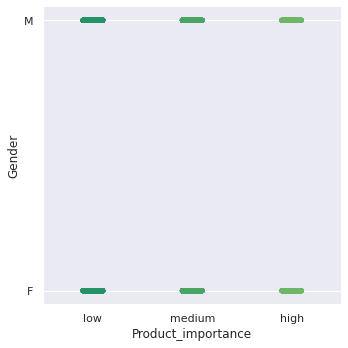

In [ ]:
sns.catplot (data=df, x='Product_importance',y='Gender')

Kurva Gender dan Reached On Time

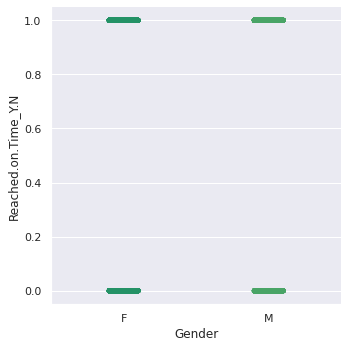

In [ ]:

sns.catplot (data=df, x='Gender',y='Reached.on.Time_Y.N')

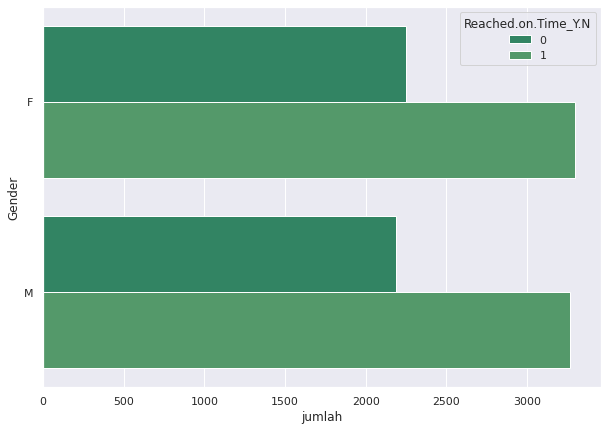

In [ ]:
#Kurva detail Gender dengan Reached on Time

plt.figure(figsize = (10,7))
df_group4= df.groupby(['Gender','Reached.on.Time_Y.N'])['ID'].nunique().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
sns.barplot(data=df_group4, x='jumlah',y='Gender', hue='Reached.on.Time_Y.N')

# **Business Insight**

Analisis dan visualisasi untuk menemukan insight dan rekomendasinya. Berdasarkan analisis multivariate terdapat korelasi reach on time atau customer care call berkolerasi dengan fitur lainnya, maka kita akan membahas Insight dari reach on time dan customer care call.


## **Insight Reach On Time**


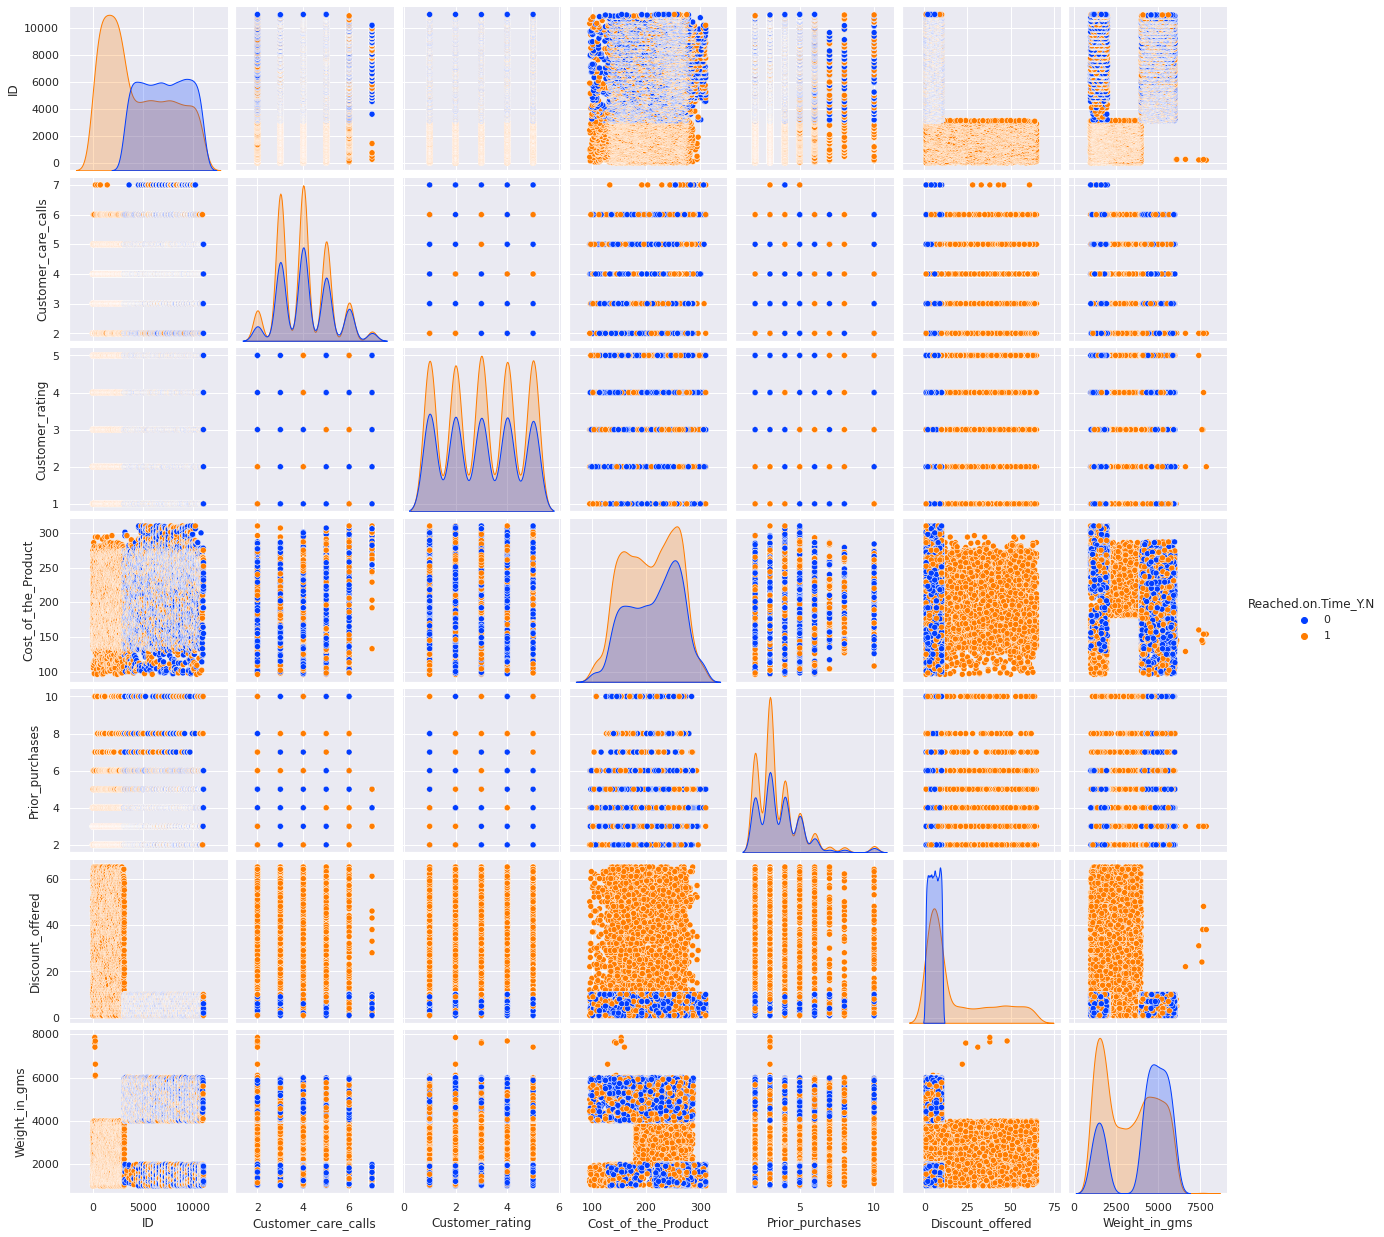

In [ ]:
sns.pairplot(df, hue='Reached.on.Time_Y.N', palette='bright')

Berdasarkan grafik diatas terdapat beberapa insight, berikut business insight yang berkolerasi dengan reach on time:
* Disclaimer: label y diisi dengan cost of the product hanya untuk visualisasi yang lebih jelas



### **1.   ID Customer dibawah 3136 tidak ada yang reach on time**



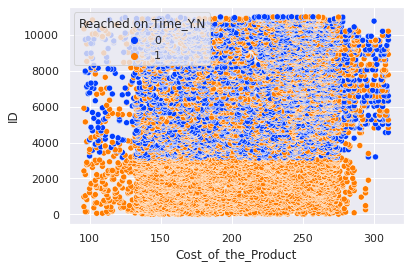

In [ ]:
sns.scatterplot(data=df,x='Cost_of_the_Product',y='ID',hue='Reached.on.Time_Y.N', palette='bright')

In [ ]:
df_id_noreach = df[df['Reached.on.Time_Y.N']== 1]
df_id_reach = df[df['Reached.on.Time_Y.N']== 0]
df_id_reach['ID'].min()

3136

Rekomendasi:

*   terdapat Error pada ID customer yang dibawah 3136 sehingga perlu ada perbaikan sistem


**Tidak ada perbedaan sebaran data antara ID customer dibawah 3136 dan  diatas 3136**



In [ ]:
def id(x):
    try:
        if x['ID'] <= 3136:
          id = 'ID dibawah 3136'
        else:
          id = 'ID diatas 3136'
        return id
    except:
        pass
df_id = df
df_id['Customer'] = df_diskon.apply(lambda x: id(x), axis=1)

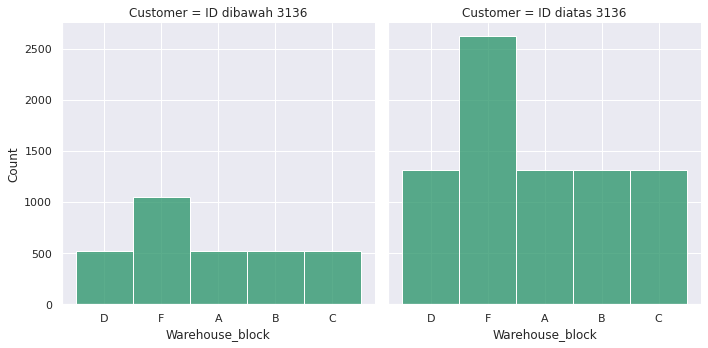

In [ ]:
sns.displot(data=df_id, x='Warehouse_block', col='Customer')

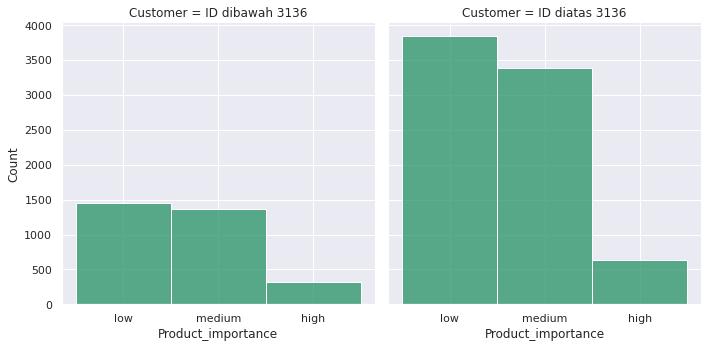

In [ ]:
sns.displot(data=df_id, x='Product_importance', col='Customer')

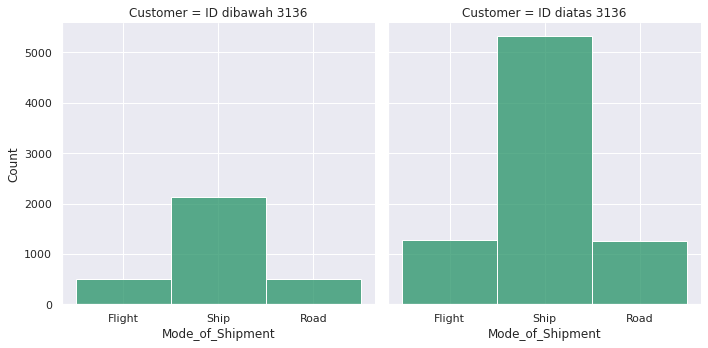

In [ ]:
sns.displot(data=df_id, x='Mode_of_Shipment', col='Customer')

### **2. Diskon diatas 10 persen tidak ada yang reach on time**

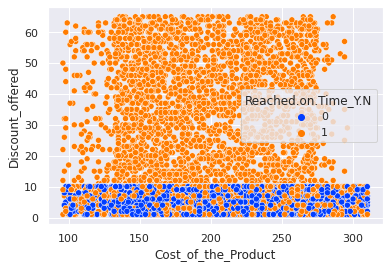

In [ ]:
sns.scatterplot(data=df, x='Cost_of_the_Product',y='Discount_offered',hue='Reached.on.Time_Y.N', palette='bright')

In [ ]:
df_id_reach['Discount_offered'].max()

10

Rekomendasi:

*   Diskon perlu dibatasi sampai dengan 10 persen agar biaya promosi untuk diskon bisa dialihkan ke biaya pengiriman





**Tidak ada perbedaan sebaran data antara diskon dibawah 10 persen dan  diatas 10 persen**

In [ ]:
def diskon(x):
    try:
        if x['Discount_offered'] <= 10:
          diskon = 'Diskon dibawah 10%'
        else:
          diskon = 'Diskon diatas 10%'
        return diskon
    except:
        pass
df_diskon = df
df_diskon['Diskon'] = df_diskon.apply(lambda x: diskon(x), axis=1)

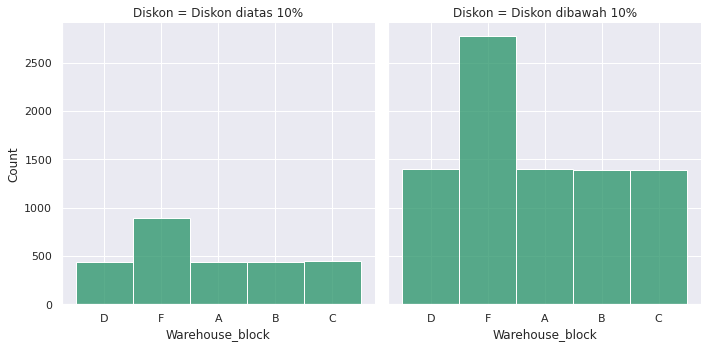

In [ ]:
sns.displot(data=df_diskon, x='Warehouse_block', col='Diskon')

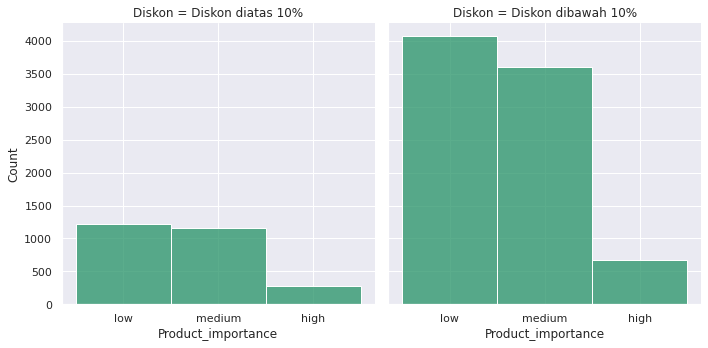

In [ ]:
sns.displot(data=df_diskon, x='Product_importance', col='Diskon')

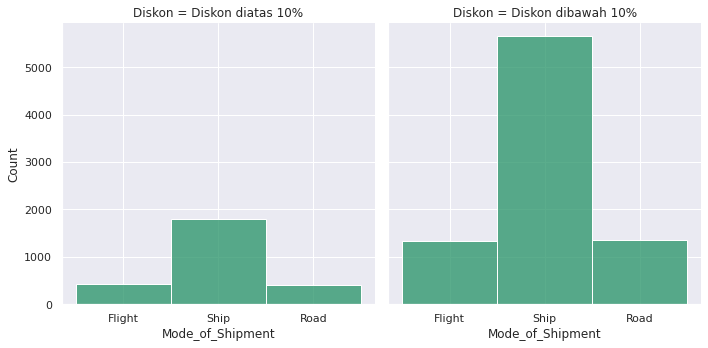

In [ ]:
sns.displot(data=df_diskon, x='Mode_of_Shipment', col='Diskon')



### **3.  Berat barang diatas 2000gr sampai 4000gr tidak ada yang reach on time**



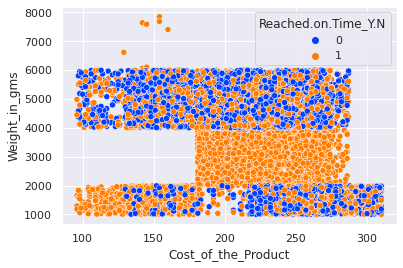

In [ ]:
sns.scatterplot(data=df, x='Cost_of_the_Product',y='Weight_in_gms',hue='Reached.on.Time_Y.N', palette='bright')

In [ ]:
df_id_reach_a = df_id_reach[df_id_reach['Weight_in_gms'] < 3000]
df_id_reach_b = df_id_reach[df_id_reach['Weight_in_gms'] > 3000]
print(df_id_reach_b['Weight_in_gms'].min())
print(df_id_reach_a['Weight_in_gms'].max())

4000
2000


Rekomendasi:


*   Barang yang beratnya diatas 2000gr sampai 4000gr perlu diklasifikasikan ke barang yang diatas 4000gr atau diberikan tambahan biaya pengiriman kepada konsumen



**Terdapat perbedaan sebaran data antara berat yang 2kg-4kg dan bukan 2kg-4kg**


*   Berat 2kg-4kg lebih dominan memilih product importance berjenis low


In [ ]:
def berat(x):
    try:
        if x['Weight_in_gms'] <= 4000:
          berat = 'Berat 2kg-4kg'
        elif x['Weight_in_gms'] < 2000:
          berat = 'Berat Bukan 2kg-4kg'
        else:
          berat = 'Berat Bukan 2kg-4kg'
        return berat
    except:
        pass
df_berat = df
df_berat['Berat'] = df_diskon.apply(lambda x: berat(x), axis=1)

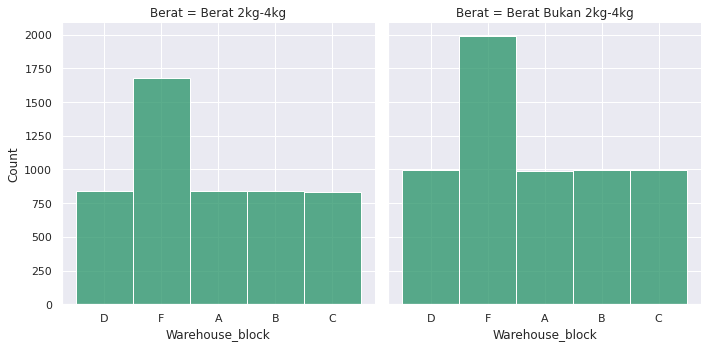

In [ ]:
sns.displot(data=df_berat, x='Warehouse_block', col='Berat')

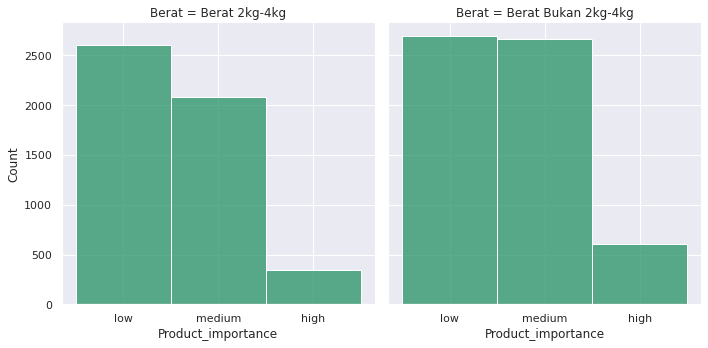

In [ ]:
sns.displot(data=df_berat, x='Product_importance', col='Berat')

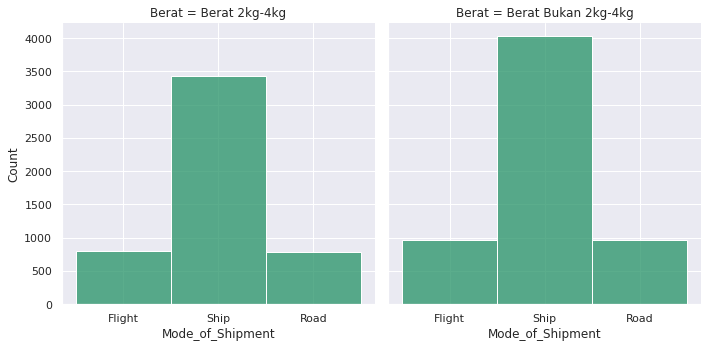

In [ ]:
sns.displot(data=df_berat, x='Mode_of_Shipment', col='Berat')

## **Insight Customer Care Calls**

### **1.   Semakin tinggi cost of the product maka customer akan semakin sering melakukan call**




In [ ]:
import plotly.express as px

In [ ]:
px.histogram(data_frame = df, x = 'Cost_of_the_Product', nbins = 100, color = 'Customer_care_calls',
             marginal = 'box')

Rekomendasi:

*   Customer yang membeli barang dengan cost of product yang tinggi bisa diberikan notifikasi secara berkala


### **2.  Semakin ringan berat barang maka customer akan semakin sering melakukan call**




In [ ]:
px.histogram(data_frame = df, x = 'Weight_in_gms', nbins = 100, color = 'Customer_care_calls',
             marginal = 'box')

Rekomendasi:

*   Customer yang membeli barang dengan berat yang ringan bisa diberikan notifikasi secara berkala

###**3.  Semakin customer sering membeli barang maka customer akan semakin sedikit melakukan call**`

In [ ]:
px.histogram(data_frame = df, x = 'Prior_purchases', nbins = 17, color = 'Customer_care_calls',marginal = 'box')

Rekomendasi:

* Customer yang lebih jarang membeli barang bisa diberikan notifikasi secara 
berkala

###**4.  Customer yang mendapatkan diskon dibawah 10 persen lebih banyak melakukan call dibandingkan customer yang mendapatkan diskon diatas 10 persen**`

In [ ]:
px.histogram(data_frame = df, x = 'Discount_offered', nbins = 100, color = 'Customer_care_calls',
             marginal = 'box')

Rekomendasi

*   Customer yang mendapatkan diskon dibawah 10 persen bisa diberikan notifikasi secara berkala

# Another Insight

In [ ]:
insight_1 = df.groupby(['Warehouse_block','Reached.on.Time_Y.N']).agg({'ID': ['count']}).reset_index()
insight_1.columns = ['Warehouse block','Reached on time','count']
insight_1['Reached on time'] = insight_1['Reached on time'].replace([0,1],['Yes','No'])
insight_1

Warehouse block Reached on time  count
0               A             Yes    758
1               A              No   1075
2               B             Yes    729
3               B              No   1104
4               C             Yes    739
5               C              No   1094
6               D             Yes    738
7               D              No   1096
8               F             Yes   1472
9               F              No   2194

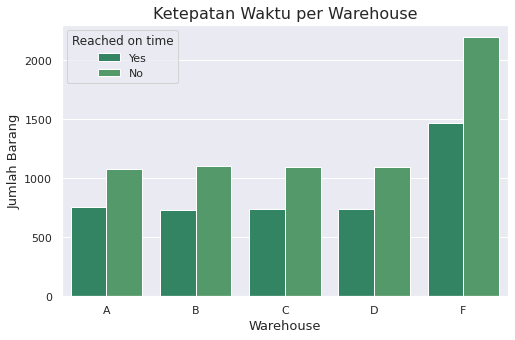

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x='Warehouse block', y='count', hue='Reached on time', data=insight_1)

plt.title('Ketepatan Waktu per Warehouse',fontsize=16)
plt.xlabel('Warehouse', fontsize=13)
plt.ylabel('Jumlah Barang', fontsize=13)
plt.show()

Another Insight 1 : Pada setiap warehouse selalu ada keterlambatan pengiriman, selain itu penyimpanan barang menumpuk di warehouse block F sesuai dengan univariate analysis pada kolom kategorikal yang telah dibuat pada soal nomor 2. Jadi, direkomendasikan untuk melakukan re-distribusi penyimpanan barang supaya lebih merata pada seluruh warehouse.

In [ ]:
insight_2 = df.groupby(['Product_importance','Reached.on.Time_Y.N']).agg({'ID': ['count']}).reset_index()
insight_2.columns = ['Product importance','Reached on time','count']
insight_2 = pd.pivot_table(insight_2,
                          index = ['Product importance'],
                          columns = ['Reached on time'],
                          values = ['count']
                          ).reset_index()
insight_2 = insight_2.reindex([1,2,0]).reset_index(drop=True)
insight_2.columns = ['Product importance','On time','Late']
insight_2['%on time'] = round(insight_2['On time']/(insight_2['On time'] + insight_2['Late'])*100,2)
insight_2['%late']    = round(insight_2['Late']/(insight_2['On time'] + insight_2['Late'])*100,2)
insight_2 = insight_2.drop(['On time','Late'], axis=1)
insight_2

Product importance  %on time  %late
0                low     40.72  59.28
1             medium     40.95  59.05
2               high     35.02  64.98

<Figure size 648x360 with 0 Axes>

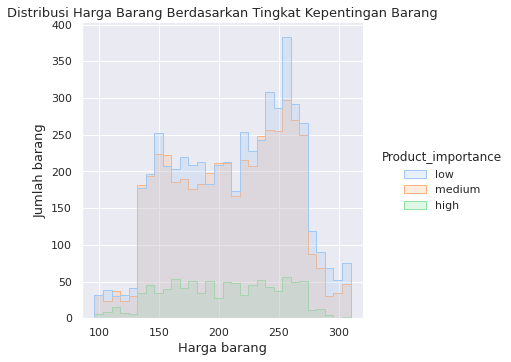

In [ ]:
plt.figure(figsize = (9,5))
sns.displot(x='Cost_of_the_Product', hue='Product_importance', data=df, element='step', palette='pastel')

plt.title('Distribusi Harga Barang Berdasarkan Tingkat Kepentingan Barang',fontsize=13)
plt.xlabel('Harga barang', fontsize=13)
plt.ylabel('Jumlah barang', fontsize=13)
plt.show()

Another Insight 2 : Diketahui bahwa barang dengan tingkat kepentingan barang 'low' dan 'medium' memiliki jumlah pemesanan yang tinggi serta diketahui juga bahwa tingkat kepentingan barang tersebut tidak ada kaitannya dengan harga barang.

Kemudian dari tabel persen ketepatan waktu, diketahui bahwa persentase pengiriman yang terlambat hampir sama pada seluruh tingkat kepentingan barang.

Jadi, dengan mempertimbangkan kedua hal tersebut, maka disarankan untuk mengutamakan pengiriman barang dengan tingkat kepentingan 'low' dan 'medium'.

In [ ]:
insight_3 = df[['Cost_of_the_Product','Discount_offered','Reached.on.Time_Y.N']]
insight_3['%discount'] = round(insight_3['Discount_offered']/insight_3['Cost_of_the_Product']*100,2)
insight_3['Reached.on.Time_Y.N'] = insight_3['Reached.on.Time_Y.N'].replace([0,1],['Yes','No'])
insight_3

<ipython-input-9-c6d7bd8ceb27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insight_3['%discount'] = round(insight_3['Discount_offered']/insight_3['Cost_of_the_Product']*100,2)
<ipython-input-9-c6d7bd8ceb27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insight_3['Reached.on.Time_Y.N'] = insight_3['Reached.on.Time_Y.N'].replace([0,1],['Yes','No'])


Cost_of_the_Product  Discount_offered Reached.on.Time_Y.N  %discount
0                      177                44                  No      24.86
1                      216                59                  No      27.31
2                      183                48                  No      26.23
3                      176                10                  No       5.68
4                      184                46                  No      25.00
...                    ...               ...                 ...        ...
10994                  252                 1                  No       0.40
10995                  232                 6                 Yes       2.59
10996                  242                 4                 Yes       1.65
10997                  223                 2                 Yes       0.90
10998                  155                 6                 Yes       3.87

[10999 rows x 4 columns]

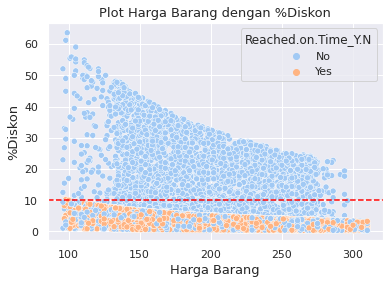

In [ ]:
sns.scatterplot(x='Cost_of_the_Product', y='%discount', hue='Reached.on.Time_Y.N', data=insight_3, palette='pastel')

plt.title('Plot Harga Barang dengan %Diskon',fontsize=13)
plt.xlabel('Harga Barang', fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('%Diskon', fontsize=13)
plt.axhline(y=10, color='r', ls='--')
plt.figsize = (20,10)
plt.show()

Another Insight 3 : Dapat dilihat dari grafik diatas bahwa barang yang diberi diskon lebih dari 10% seluruhnya mengalami keterlambatan pengiriman.

Direkomendasikan agar pengiriman untuk barang yang diskon perlu diperhatikan supaya customer tidak berpikiran negatif bahwa perusahaan mengutamakan pengiriman barang dengan diskon kecil.